
# 🎯 Goal: Building an Early Warning System

---

## Objective: Early Warning System for financial crisis

Financial markets are shaped by shifts in investor risk appetite, alternating between “risk-on” phases (when investors seek higher returns), and “risk-off” phases (when they retreat to safety). Identifying these transitions early can provide a critical edge in asset allocation and risk control. Therefore, the aim of this project is to develop an **Early Warning System **based on **anomaly detection**, treating risk-off regimes as abnormal deviations from typical market dynamics. Using engineered features derived from macro and market indicators, we apply different machine learning techniques to detect these shifts in real time. The goal is not to predict crises, but to recognize them as they begin—offering a practical, data-driven approach to systemic risk monitoring.

After developing such system, we will use it for developing our **trading strategy**.



## **PREPARING THE DATA:**

We will experiment with several different models in order to find the one that works the best. For each model, we report a comprehensive set of evaluation metrics to assess its performance. At the end of the notebook, we summarize the results in a final table that compares all models across the key metrics.

In this case we skip the data analysis and features selection / engineering part that we implement in another specific notebook

In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.metrics import precision_score, recall_score, f1_score

# Configure visualization settings
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Mount Google Drive to access files
# Skip remounting if already mounted
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    print("Drive already mounted or not in Colab environment.")


Mounted at /content/drive


#### Real-World dataset

As already explained we now upload a real-world dataset from Bloomberg, consisting of weekly observations.    

<br>


In [2]:
# Define the path to the dataset
file_path = '/content/drive/MyDrive/Fintech/BC4/Dataset4_EWS.xlsx'


Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)

Metadata and statistics:


Ticker                     Description         Mean      Std.Dev  \
0        BDIY                Baltic Dry Index  2259.860486  2017.811888   
1         CRY              TR/CC CRB ER Index   245.247649    68.278081   
2         Cl1         Generic 1st 'CL' Future    60.708101    25.900813   
3         DXY               DOLLAR INDEX SPOT    90.934982    11.379095   
4    ECSURPUS  Bloomberg ECO US Surprise Inde     0.036153     0.349453   
5    EMUSTRUU                EM USD Aggregate   704.379495   309.951768   
6       EONIA  EMMI EURO OverNight Index Aver     1.363676     1.721894   
7         GBP              British Pound Spot     1.569618     0.212340   
8        GT10                 US TREASURY N/B     3.266748     1.332464   
9    GTDEM10Y        BUNDESREPUB. DEUTSCHLAND     2.448365     1.851558   
10    GTDEM2Y         BUNDESSCHATZANWEISUNGEN     1.431110     1.876061   
11   GTDEM30Y        BUNDESREPUB. DEUTSCHLAND     3.039282     1.779526   
12   GTGBP20Y              UK TSY 1 1/4% 2041     3.445731     1.366188   
13    GTGBP2Y              UK TSY 0 1/8% 2023     2.299739     2.128539   
14   GTGBP30Y              UK TSY 0 5/8% 2050     3.450121     1.263211   
15  GTITL10YR        BUONI POLIENNALI DEL TES     3.680791     1.465289   
16   GTITL2YR        BUONI POLIENNALI DEL TES     2.104911     1.700726   
17  GTITL30YR        BUONI POLIENNALI DEL TES     4.426725     1.274729   
18  GTJPY10YR           JAPAN (10 YEAR ISSUE)     0.904126     0.643985   
19   GTJPY2YR            JAPAN (2 YEAR ISSUE)     0.150180     0.297519   
20  GTJPY30YR           JAPAN (30 YEAR ISSUE)     1.724494     0.720026   
21        JPY               Japanese Yen Spot   106.605734    12.840754   
22   LF94TRUU         Global Inflation-Linked   259.052663    75.934443   
23   LF98TRUU         US Corporate High Yield  1231.258119   553.121000   
24   LG30TRUU               Global High Yield   804.720625   370.251996   
25     LMBITR            Municipal Bond Index   883.615439   241.507125   
26   LP01TREU         Pan-European High Yield   232.109928   109.917622   
27   LUACTRUU                       Corporate  2077.306949   690.731794   
28   LUMSTRUU                        U.S. MBS  1637.293510   417.229338   
29       MXBR                     MSCI BRAZIL  1903.216436   986.468254   
30       MXCN                      MSCI CHINA    53.933159    24.738356   
31       MXEU                     MSCI EUROPE   107.877138    20.795973   
32       MXIN                      MSCI INDIA   693.156616   405.527014   
33       MXJP                      MSCI JAPAN   784.846292   200.076443   
34       MXRU                     MSCI RUSSIA   648.681377   299.096020   
35       MXUS                        MSCI USA  1606.997102   698.481956   
36    US0001M           ICE LIBOR USD 1 Month     1.836073     1.909032   
37    USGG2YR            US Generic Govt 2 Yr     1.990358     1.710307   
38   USGG30YR           US Generic Govt 30 Yr     3.908324     1.178592   
39     USGG3M           US Generic Govt 3 Mth     1.575151     1.802895   
40        VIX           Cboe Volatility Index    19.992169     8.642157   
41    XAUBGNL                         XAUBGNL   987.463744   494.623740   

          Min          Max  Missing values Missing (%)  
0   291.00000  11793.00000               0       0.00%  
1   106.29290    467.57000               0       0.00%  
2    10.01000    140.97000               0       0.00%  
3    71.32900    119.82000               0       0.00%  
4    -0.97400      0.99100               0       0.00%  
5   230.52670   1286.35300               0       0.00%  
6    -0.49800      5.73000               0       0.00%  
7     1.17230      2.08520               0       0.00%  
8     0.50800      6.74800               0       0.00%  
9    -0.79400      5.64400               0       0.00%  
10   -0.96800      5.26400               0       0.00%  
11   -0.47100      6.25400               0       0.00%  
12    0.48920      5.24180              

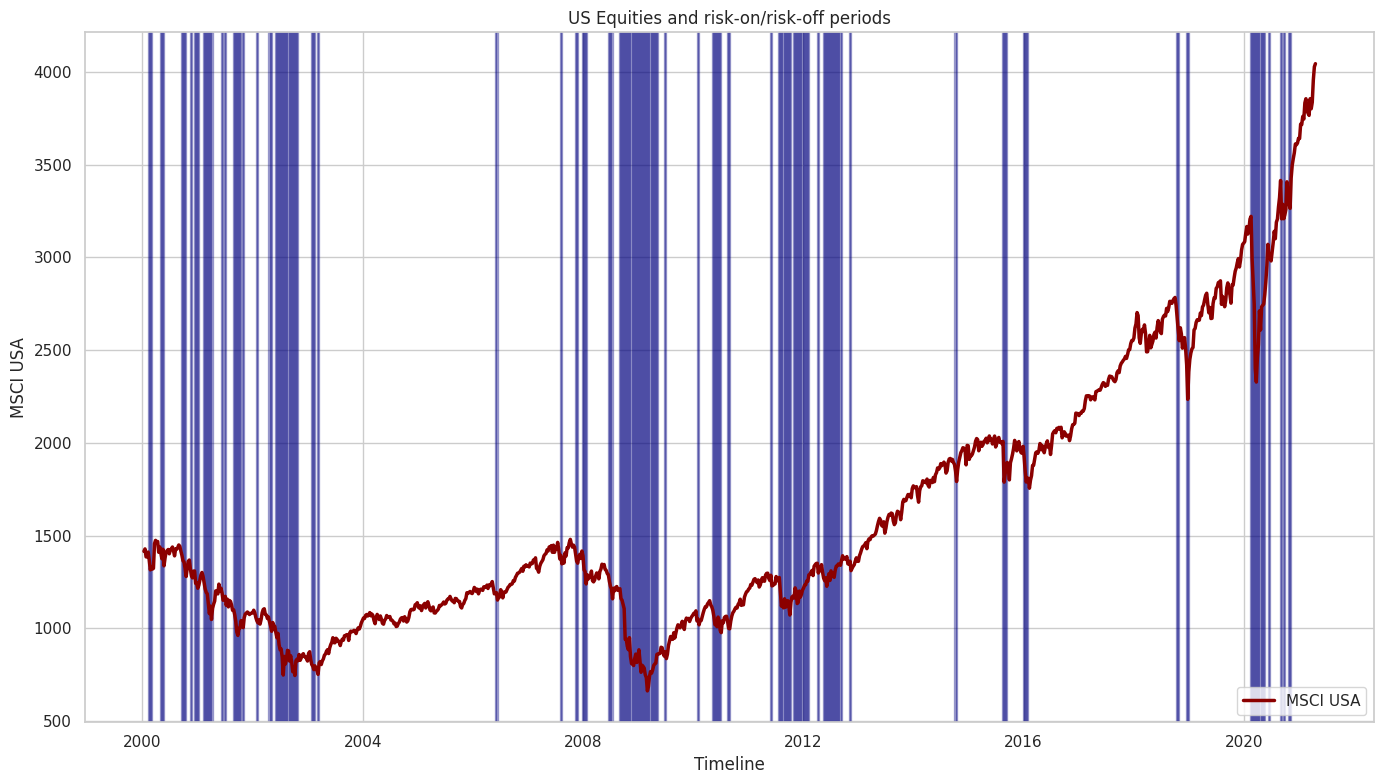

In [3]:
# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Load the data from the Excel file
# First sheet contains market data with dates and anomaly labels, second sheet contains metadata
data_df = pd.read_excel(file_path, sheet_name='Markets')
metadata_df = pd.read_excel(file_path, sheet_name='Metadata')

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col].values
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")

# Create a more comprehensive metadata table with additional statistics
enhanced_metadata = []

# Determine the correct column names for ticker and description
ticker_col = 'ticker' if 'ticker' in metadata_df.columns else metadata_df.columns[0]
desc_col = 'description' if 'description' in metadata_df.columns else metadata_df.columns[1] if len(metadata_df.columns) > 1 else ticker_col

for ticker in X_df.columns:
    # Get metadata for this ticker if available
    meta_row = metadata_df[metadata_df[ticker_col] == ticker] if ticker in metadata_df[ticker_col].values else pd.DataFrame()

    # Get description or use ticker if not found
    description = meta_row[desc_col].values[0] if not meta_row.empty and desc_col in meta_row.columns else ticker

    # Calculate statistics for this series
    series = X_df[ticker]

    enhanced_metadata.append({
        'Ticker': ticker,
        'Description': description,
        'Mean': series.mean(),
        'Std.Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Missing values': series.isna().sum(),
        'Missing (%)': f"{series.isna().mean()*100:.2f}%"
    })

# Create enhanced metadata dataframe
enhanced_meta_df = pd.DataFrame(enhanced_metadata)

# Display the enhanced metadata
print("\nMetadata and statistics:")
display(enhanced_meta_df)

# Create a plot with anomalies as vertical bars and MXUS as a line
if y_col and 'MXUS' in X_df.columns:
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot MXUS line
    ax.plot(X_df.index, X_df['MXUS'], color='darkred', linewidth=2.5, label='MSCI USA')

    # Get the y-axis limits after plotting MXUS
    y_min, y_max = ax.get_ylim()

    # For each anomaly point (Y=1), create a vertical span across the entire plot
    for i, (date, is_anomaly) in enumerate(zip(X_df.index, y)):
        if is_anomaly == 1:
            ax.axvspan(date, date + pd.Timedelta(days=7), alpha=0.3, color='navy', label='Risk-on/Risk-off' if i == 0 else "")

    # Set labels and title
    ax.set_xlabel('Timeline')
    ax.set_ylabel('MSCI USA')
    ax.set_title('US Equities and risk-on/risk-off periods')

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='best')

    plt.tight_layout()
    plt.show()
else:
    print("Either 'Y' column or 'MXUS' column is missing in the dataset.")


In [4]:
##### STATIONARITY  #######
# We define a list of variables, divided by type. According to the type of feature, the timeseries are made stationary

indices_currencies = [col for col in X_df.columns if col in [
    'XAUBGNL', 'BDIY', 'CRY', 'Cl1', 'DXY', 'EMUSTRUU', 'GBP', 'JPY', 'LF94TRUU',
    'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU',
    'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'VIX'
]]

interest_rates = [col for col in X_df.columns if col in [
    'EONIA', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y',
    'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR',
    'US0001M', 'USGG3M', 'USGG2YR', 'GT10', 'USGG30YR'
]]

# Create a new dataframe for stationary data
stationary_df = pd.DataFrame(index=X_df.index[1:])

# Apply log-differences to indices and currencies (always positive)
for col in indices_currencies:
    if col in X_df.columns:
        stationary_df[col] = np.diff(np.log(X_df[col]))

# Apply first differences to interest rates (can be negative or very close to 0)
for col in interest_rates:
    if col in X_df.columns:
        stationary_df[col] = np.diff(X_df[col])

# Keep Bloomberg Economic US Surprise Index as is (already stationary)
if 'ECSURPUS' in X_df.columns:
    stationary_df['ECSURPUS'] = X_df['ECSURPUS'].values[1:]

# Adjust the response variable to match the new data length
if y is not None:
    y_stationary = y[1:]
else:
    y_stationary = None


In [5]:
print(stationary_df.columns) # just to check if stationary colums are ok

Index(['BDIY', 'CRY', 'Cl1', 'DXY', 'EMUSTRUU', 'GBP', 'JPY', 'LF94TRUU',
       'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU',
       'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'VIX',
       'XAUBGNL', 'EONIA', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y',
       'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR',
       'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'US0001M', 'USGG2YR', 'USGG30YR',
       'USGG3M', 'ECSURPUS'],
      dtype='object')


## **MODELS AND TUNING  WITH OPTUNA**

Now we start to analyze all the models.
For each model we perform a tuning of some trials thanks to optuna library.

In [6]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 4.8 MB/s eta 0:00:00


In [7]:
# Step 1: shuffle and split data into training, validation, and test sets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]
new_stationary_df = pd.DataFrame(stationary_df[['Cl1', 'MXUS', 'MXEU']])

# Convert to numpy arrays for easier manipulation
X = stationary_df.values
#X = new_stationary_df.values
y = y_stationary

# Step 1: Creating training/cross-validation/test set with reshuffling

# Reshuffle the data (this will break down autocorrelation)
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

# Separate normal and anomalous examples
X_normal = X_shuffled[y_shuffled == 0]
X_anomaly = X_shuffled[y_shuffled == 1]

# Calculate sizes for each set
n_normal = X_normal.shape[0]
n_anomaly = X_anomaly.shape[0]

# Training set: 80% of normal examples
train_size = int(0.8 * n_normal)
X_train = X_normal[:train_size]

# Cross-validation set: 10% of normal examples and 50% of anomalies
cv_normal_size = int(0.1 * n_normal)
cv_anomaly_size = int(0.5 * n_anomaly)
X_cv_normal = X_normal[train_size:train_size + cv_normal_size]
X_cv_anomaly = X_anomaly[:cv_anomaly_size]
X_cross_val = np.vstack((X_cv_normal, X_cv_anomaly))
y_cross_val = np.hstack((np.zeros(cv_normal_size), np.ones(cv_anomaly_size)))

# Test set: 10% of normal examples and 50% of anomalies
X_test_normal = X_normal[train_size + cv_normal_size:]
X_test_anomaly = X_anomaly[cv_anomaly_size:]
X_test = np.vstack((X_test_normal, X_test_anomaly))
y_test = np.hstack((np.zeros(len(X_test_normal)), np.ones(len(X_test_anomaly))))

# We'll standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_cross_val = scaler.transform(X_cross_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} (all normal)")
print(f"Cross-validation set size: {X_cross_val.shape[0]} ({cv_normal_size} normal, {cv_anomaly_size} anomalies)")
print(f"Test set size: {X_test.shape[0]} ({len(X_test_normal)} normal, {len(X_test_anomaly)} anomalies)")


Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)


### 1) MVG-based anomaly detector with supervised threshold tuning

We now apply a **Multivariate Gaussian anomaly detector**  to this real-world dataset of financial assets. This is a probabilistic model trained on normal data only, and will be our baseline model, the benchmark.

We follow these steps:

1. Fit the distribution of normal data.
2. Score all points using the estimated PDF.
3. Tune the threshold $\varepsilon$ on a labeled validation set.
4. Evaluate on a held-out test set.


#### Model fit and threshold tuning

We fit the model on the training set, compute the PDF on the validation set, and search for the best threshold $\varepsilon$ by maximizing the F1 score.


In [8]:
# Step 2: Training the model (estimating parameters of multivariate Gaussian)

# Calculate mean vector
mu = np.mean(X_train, axis=0)

# Calculate covariance matrix
sigma = np.cov(X_train, rowvar=False)

print(f"Mean vector shape: {mu.shape}")
print(f"Covariance matrix shape: {sigma.shape}")


Mean vector shape: (42,)
Covariance matrix shape: (42, 42)


Best F1 score on CV set: 0.7616
Best Epsilon: 8.09971191e-14
Corresponding Precision: 0.6250
Corresponding Recall: 0.9746


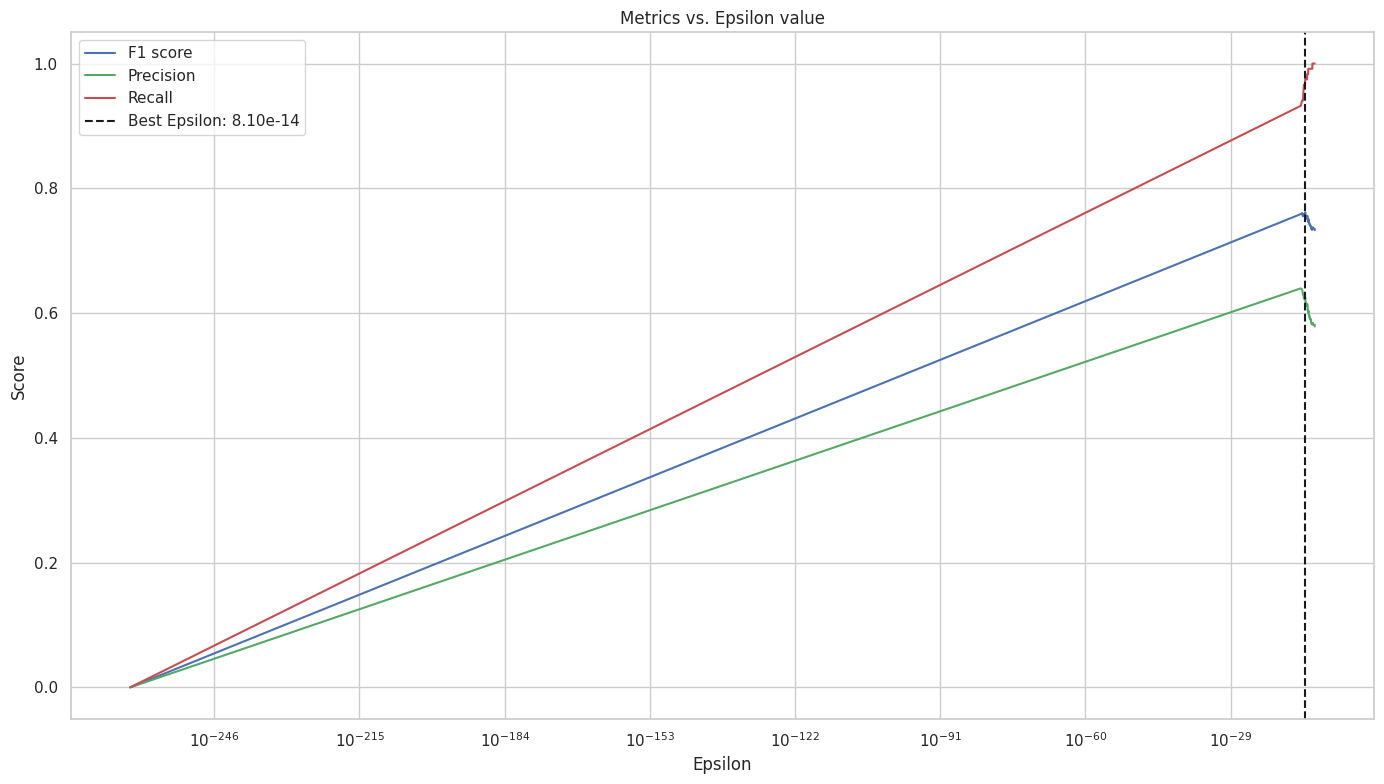

In [9]:
# Step 3: Fine tuning the hyperparameter, the threshold ϵ

# Function to calculate multivariate Gaussian PDF
def multivariate_gaussian_pdf(X, mu, sigma):
    """Calculate the multivariate Gaussian probability density function"""
    n = mu.shape[0]

    # Handle potential numerical issues with the covariance matrix
    # Add a small regularization term to ensure positive definiteness
    sigma_reg = sigma + np.eye(n) * 1e-8

    # Calculate determinant and inverse
    try:
        det = np.linalg.det(sigma_reg)
        inv = np.linalg.inv(sigma_reg)
    except np.linalg.LinAlgError:
        # If still having issues, use pseudo-inverse
        print("Warning: Using pseudo-inverse for covariance matrix")
        det = max(np.linalg.det(sigma_reg), 1e-10)
        inv = np.linalg.pinv(sigma_reg)

    # Calculate PDF for each example
    p = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        x_mu = X[i] - mu
        p[i] = (1.0 / (np.power(2 * np.pi, n/2) * np.sqrt(det))) * \
               np.exp(-0.5 * x_mu.dot(inv).dot(x_mu))

    return p

# Compute the probability density function for the cross-validation set
p_cv = multivariate_gaussian_pdf(X_cross_val, mu, sigma)
#just to try with pca data
#p_cv = multivariate_gaussian_pdf(x_cross_pca, mu_pca, sigma_pca)
# Find the range of epsilon values to search
min_epsilon = np.min(p_cv)
max_epsilon = np.max(p_cv)
step_size = (max_epsilon - min_epsilon) / 1000

# Find the best epsilon using F1 score
best_epsilon = 0
best_f1 = 0
best_precision = 0
best_recall = 0

epsilon_values = np.arange(min_epsilon, max_epsilon, step_size)
f1_scores = []
precisions = []
recalls = []

for epsilon in epsilon_values:
    predictions = (p_cv < epsilon).astype(int)

    # Calculate metrics
    precision = precision_score(y_cross_val, predictions, zero_division=0)
    recall = recall_score(y_cross_val, predictions, zero_division=0)

    # Calculate F1 score
    if precision + recall > 0:  # Avoid division by zero
        f1 = 2 * precision * recall / (precision + recall)
    else:
        f1 = 0

    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

    if f1 > best_f1:
    #if recall > best_recall:
        best_f1 = f1
        best_epsilon = epsilon
        best_precision = precision
        best_recall = recall

print(f"Best F1 score on CV set: {best_f1:.4f}")
print(f"Best Epsilon: {best_epsilon:.8e}")
print(f"Corresponding Precision: {best_precision:.4f}")
print(f"Corresponding Recall: {best_recall:.4f}")

# Plot F1 score, precision, and recall vs epsilon
plt.figure(figsize=(14, 8))
plt.plot(epsilon_values, f1_scores, 'b-', label='F1 score')
plt.plot(epsilon_values, precisions, 'g-', label='Precision')
plt.plot(epsilon_values, recalls, 'r-', label='Recall')
plt.axvline(x=best_epsilon, color='k', linestyle='--', label=f'Best Epsilon: {best_epsilon:.2e}')
plt.xlabel('Epsilon')
plt.ylabel('Score')
plt.title('Metrics vs. Epsilon value')
plt.legend()
plt.xscale('log')  # Log scale for better visualization
plt.grid(True)
plt.tight_layout()
plt.show()


#### Model evaluation on test set

We apply the selected threshold to the test set (unseen data) and evaluate the results using precision, recall, F1 score, and confusion matrix. We visualize the classification outcome using two selected features, to better understand false positives and false negatives in feature space.



Test set performance:
Precision: 0.6031
Recall: 0.9832
F1 Score: 0.7476

Confusion Matrix:
True Negatives: 11
False Positives: 77
False Negatives: 2
True Positives: 117


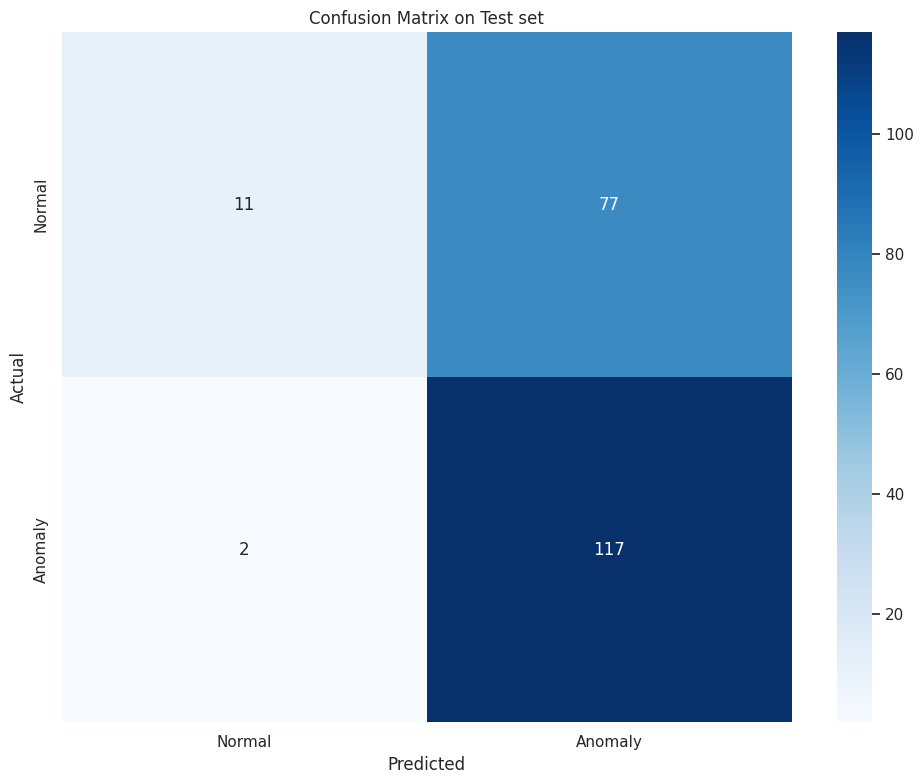

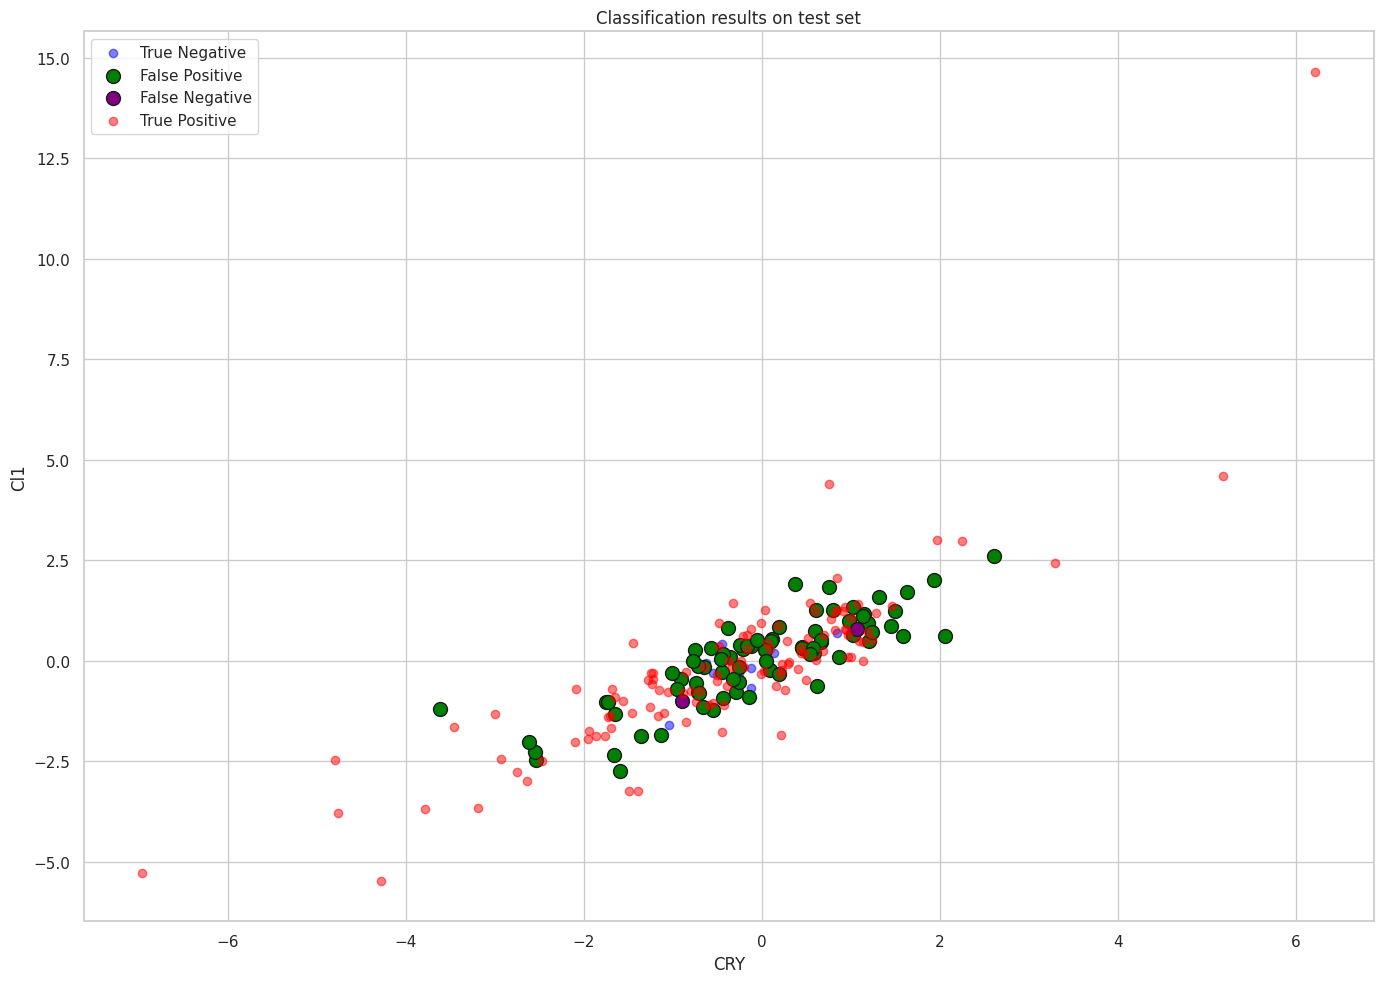

In [10]:
from sklearn.metrics import confusion_matrix


# Step 4: Testing the model

# Compute the probability density function for the test set
p_test = multivariate_gaussian_pdf(X_test, mu, sigma)
#p_test_pca = multivariate_gaussian_pdf(x_test_pca, mu_pca, sigma_pca)
# Make predictions using the best epsilon
predictions = (p_test < best_epsilon).astype(int)

# Calculate metrics
MVG_precision = precision_score(y_test, predictions, zero_division=0)
MVG_recall = recall_score(y_test, predictions, zero_division=0)
MVG_f1 = f1_score(y_test, predictions, zero_division=0)

print("\nTest set performance:")
print(f"Precision: {MVG_precision:.4f}")
print(f"Recall: {MVG_recall:.4f}")
print(f"F1 Score: {MVG_f1:.4f}")

# Add autoencoder results to the comparison DataFrame
results_df = pd.DataFrame([
    ("MVG", MVG_precision, MVG_recall, MVG_f1)
], columns=['Model', 'Precision', 'Recall', 'F1 Score'])


# Create confusion matrix
cm = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test set')
plt.tight_layout()
plt.show()


# Visualize examples of correctly and incorrectly classified points
# Select two features for visualization
if X_test.shape[1] >= 2:
    # Choose two features (columns) for visualization
    feature1_idx = 1  # First feature
    feature2_idx = 2  # Second feature

    # Get feature names
    feature1_name = stationary_df.columns[feature1_idx]
    feature2_name = stationary_df.columns[feature2_idx]

    plt.figure(figsize=(14, 10))

    # True negatives (correctly classified normal points)
    plt.scatter(X_test[(y_test == 0) & (predictions == 0), feature1_idx],
                X_test[(y_test == 0) & (predictions == 0), feature2_idx],
                c='blue', marker='o', alpha=0.5, label='True Negative')

    # False positives (normal points classified as anomalies)
    plt.scatter(X_test[(y_test == 0) & (predictions == 1), feature1_idx],
                X_test[(y_test == 0) & (predictions == 1), feature2_idx],
                c='green', marker='o', s=100, edgecolors='k', label='False Positive')

    # False negatives (anomalies classified as normal)
    plt.scatter(X_test[(y_test == 1) & (predictions == 0), feature1_idx],
                X_test[(y_test == 1) & (predictions == 0), feature2_idx],
                c='purple', marker='o', s=100, edgecolors='k', label='False Negative')

    # True positives (correctly classified anomalies)
    plt.scatter(X_test[(y_test == 1) & (predictions == 1), feature1_idx],
                X_test[(y_test == 1) & (predictions == 1), feature2_idx],
                c='red', marker='o', alpha=0.5, label='True Positive')

    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title('Classification results on test set')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Comparing Anomaly Detection Models

We now explore several anomaly detection methods, from simpler models to deep learning. All models are tested on the **same financial dataset**, and evaluated using consistent metrics: **Precision, Recall, F1 Score, Confusion Matrix, ROC Curve**, and **PCA projections**.

The categories of models are:

- **MVG Baseline**: the baseline
- **Supervised models**: Random Forest, SVM.
- **Unsupervised models**: Isolation Forest, Local Outlier Factor, One-Class SVM, Gaussian Mixture.
- **Deep learning**: Autoencoder trained on normal data, scored via reconstruction error.



In [11]:
# Step 0: Functions and utilities for comparison of supervised and unsupervised Anomaly Detection methods

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM, SVC
from sklearn.neighbors import LocalOutlierFactor

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# We already have X_train, X_cross_val, y_cross_val, X_test, y_test from previous code cells
# We'll standardize the data for better performance with many algorithms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cross_val)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate and visualize model performance
def evaluate_model(y_true, y_pred, y_score, model_name, results_df=None, save_results=False):
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"\n{model_name} Performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    if save_results:
        # Add results to the comparison DataFrame
      results_df.loc[len(results_df)] = [model_name, precision, recall, f1]

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Anomaly'],
                yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    if y_score is not None:  # Some models don't provide probability scores
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

    return precision, recall, f1

# Function to visualize results in PCA space
def visualize_pca(X, y_true, y_pred, model_name):
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['Actual'] = y_true
    pca_df['Predicted'] = y_pred

    # Create classification categories
    pca_df['Category'] = 'Unknown'
    pca_df.loc[(y_true == 0) & (y_pred == 0), 'Category'] = 'True Negative'
    pca_df.loc[(y_true == 0) & (y_pred == 1), 'Category'] = 'False Positive'
    pca_df.loc[(y_true == 1) & (y_pred == 0), 'Category'] = 'False Negative'
    pca_df.loc[(y_true == 1) & (y_pred == 1), 'Category'] = 'True Positive'

    # Calculate explained variance
    explained_variance = pca.explained_variance_ratio_
    total_variance = sum(explained_variance)

    # Plot
    plt.figure(figsize=(12, 8))

    # Define colors and sizes
    colors = {'True Negative': 'gray', 'True Positive': 'black',
              'False Positive': 'red', 'False Negative': 'blue'}
    alphas = {'True Negative': 0.3, 'True Positive': 0.5,
              'False Positive': 0.8, 'False Negative': 0.8}
    sizes = {'True Negative': 30, 'True Positive': 40,
             'False Positive': 80, 'False Negative': 80}

    # Plot each category
    for category, group in pca_df.groupby('Category'):
        plt.scatter(group['PC1'], group['PC2'],
                    color=colors[category],
                    alpha=alphas[category],
                    s=sizes[category],
                    label=f"{category} ({len(group)})")

    plt.title(f'PCA projection - {model_name}\nExplained variance: {total_variance:.2%}', fontsize=16)
    plt.xlabel(f'PC1 ({explained_variance[0]:.2%})', fontsize=14)
    plt.ylabel(f'PC2 ({explained_variance[1]:.2%})', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Store results for comparison
results = []



### 2) Supervised models

These models are trained using the anomaly labels we have, thus they explicitly learn to separate normal and anomalous cases based on known examples. So, the training set includes both normal and anomalous data, combined from the original training and validation sets.

In particular, we use:

- **Random Forest Classifier**.
- **Support Vector Machine (SVM)**.



####2.1) Random Forest Classifier

SUPERVISED ANOMALY DETECTION METHODS

Training Random Forest classifier...

Random Forest (Supervised) Performance:
Precision: 1.0000
Recall: 0.0252
F1 Score: 0.0492


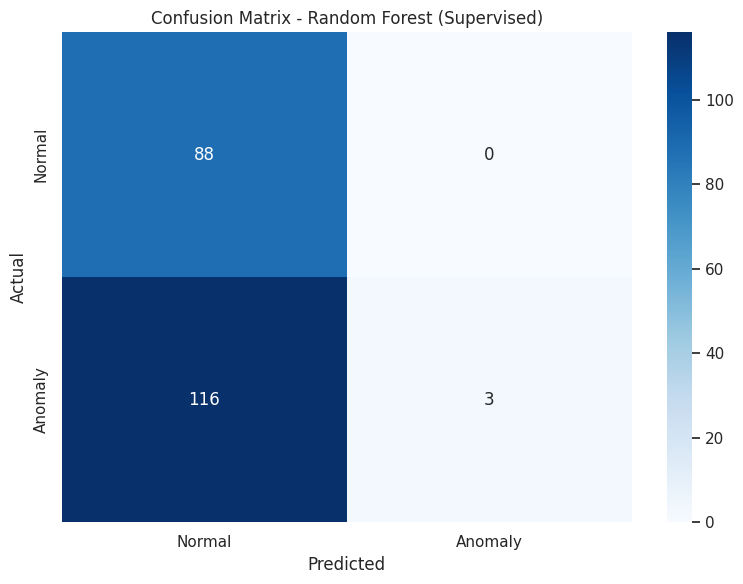

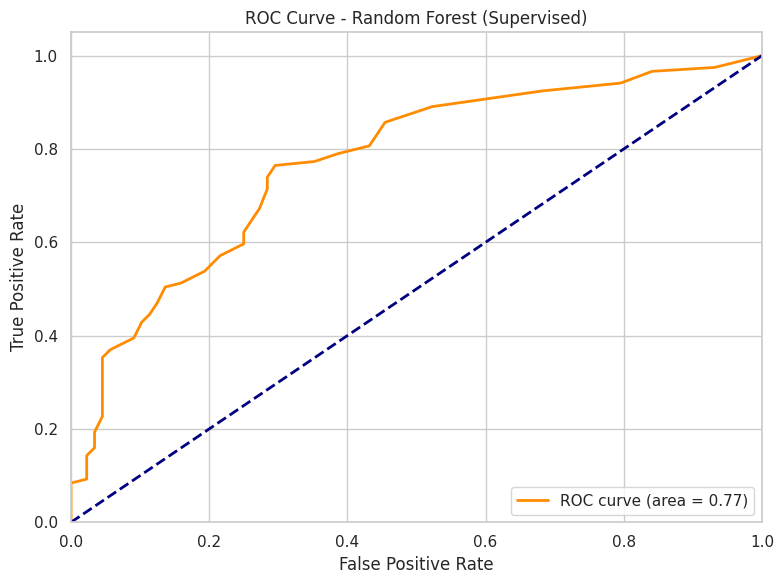

In [12]:
print("=" * 50)
print("SUPERVISED ANOMALY DETECTION METHODS")
print("=" * 50)

# Random Forest Classifier
print("\nTraining Random Forest classifier...")
# For supervised methods, we need to combine training and cross-validation sets in order to have some anomalies to train with
X_train_cv = np.vstack((X_train_scaled, X_cv_scaled))
y_train_cv = np.hstack((np.zeros(len(X_train_scaled)), y_cross_val))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_cv, y_train_cv)  # Train on combined data

# Predict on test set
rf_pred = rf_model.predict(X_test_scaled)
rf_score = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (anomaly)

# Evaluate
rf_metrics = evaluate_model(y_test, rf_pred, rf_score, "Random Forest (Supervised)",results_df, save_results=True)
results.append(("Random Forest (Supervised)", *rf_metrics))

#### 2.2 ) Support Vector Machine


Training Support Vector Machine...

SVM (Supervised) Performance:
Precision: 0.8841
Recall: 0.5126
F1 Score: 0.6489


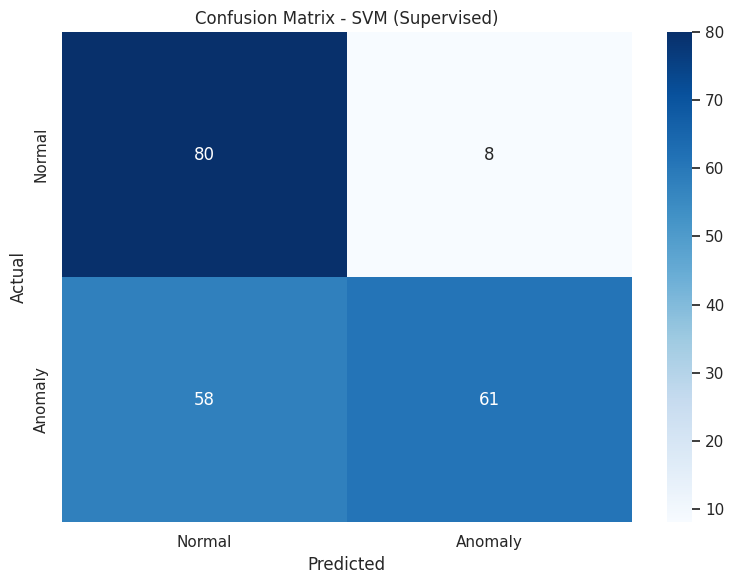

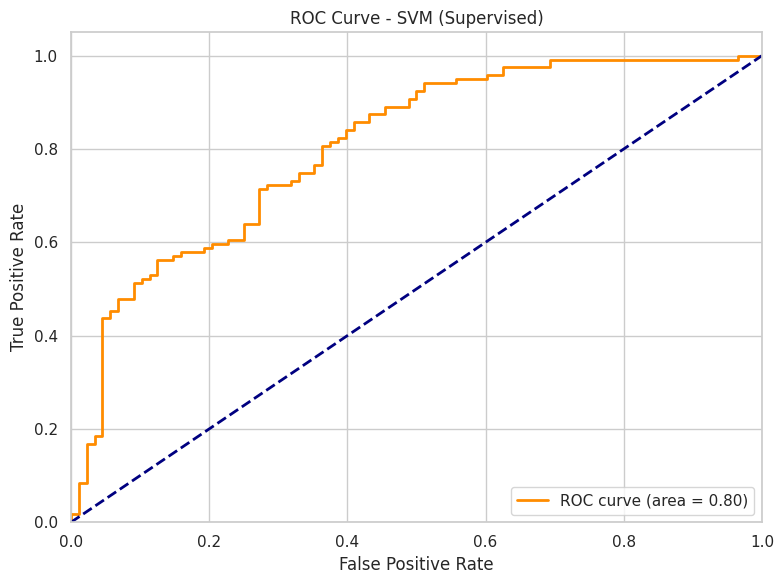

In [13]:
print("\nTraining Support Vector Machine...")
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_cv, y_train_cv)

# Predict on test set
svm_pred = svm_model.predict(X_test_scaled)
svm_score = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
svm_metrics = evaluate_model(y_test, svm_pred, svm_score, "SVM (Supervised)", results_df, save_results=True)
results.append(("SVM (Supervised)", *svm_metrics))


### 3) Unsupervised Models

We now test a series of unsupervised models — these do **not use any labels during training** and rely solely on data structure. So we don't use our response vector Y during the training.

The models we consider are:

- **[Isolation Forest](https://en.wikipedia.org/wiki/Isolation_forest)**.
- **[One-Class SVM](https://en.wikipedia.org/wiki/One-class_classification)**.
- **[Local Outlier Factor (LOF)](https://en.wikipedia.org/wiki/Local_outlier_factor)**.
- **[Gaussian Mixture Model (GMM)](https://en.wikipedia.org/wiki/Mixture_model)**.

All of them require an estimate of the expected **contamination** (anomaly rate), which we derive from the validation set for consistency. To avoid degenerate behavior, we cap the contamination at 50%.

Here we use the original data split (train\cv\test).




In [14]:
print("\n" + "=" * 50)
print("UNSUPERVISED ANOMALY DETECTION METHODS")
print("=" * 50)

# Calculate contamination from cross-validation set
raw_contamination = np.mean(y_cross_val)
print(f"\nEstimated contamination from cross-validation set: {raw_contamination:.4f}")

# Cap contamination for algorithms that have limits
contamination = min(raw_contamination, 0.5)
print(f"Using capped contamination value: {contamination:.4f}")



UNSUPERVISED ANOMALY DETECTION METHODS

Estimated contamination from cross-validation set: 0.5756
Using capped contamination value: 0.5000


#### Isolation Forest

The Isolation Forest algorithm isolates anomalies by recursively partitioning the data using random splits.

It is efficient, scalable, and works well in high dimensions.



Training Isolation Forest...

Isolation Forest (Unsupervised) Performance:
Precision: 0.6838
Recall: 0.7815
F1 Score: 0.7294


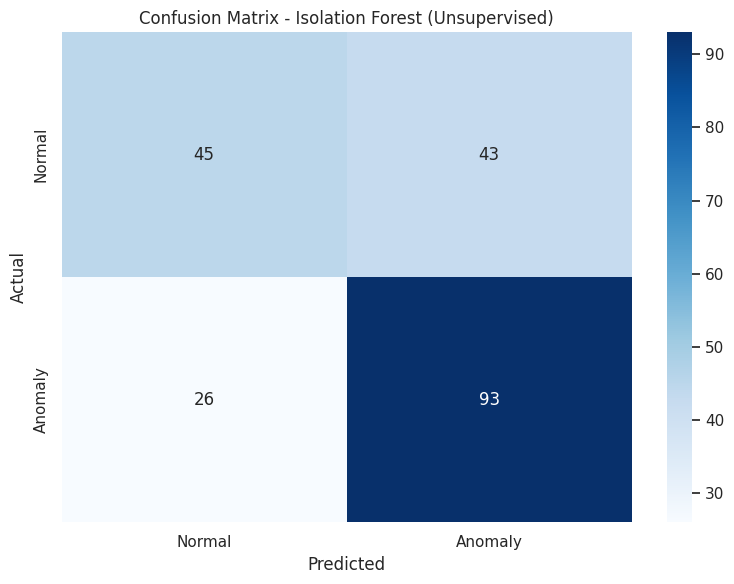

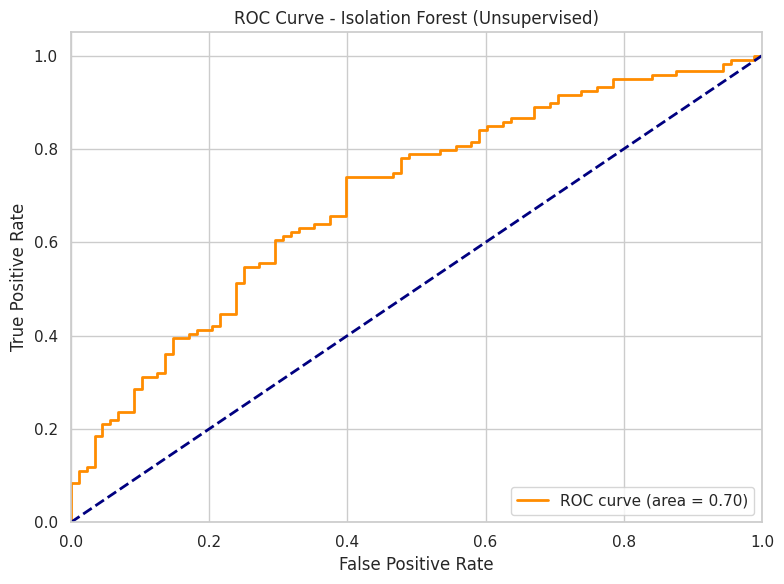

In [15]:
# 3.1 Isolation Forest
print("\nTraining Isolation Forest...")
iso_model = IsolationForest(contamination=contamination, random_state=42)
iso_model.fit(X_train_scaled)

# Predict on test set (convert from 1/-1 to 0/1, where 1 means anomaly)
iso_pred = (iso_model.predict(X_test_scaled) == -1).astype(int)
iso_score = -iso_model.score_samples(X_test_scaled)  # Negative of the anomaly score

# Evaluate
iso_metrics = evaluate_model(y_test, iso_pred, iso_score, "Isolation Forest (Unsupervised)", results_df, save_results=True)
results.append(("Isolation Forest (Unsupervised)", *iso_metrics))


#### One-Class SVM

The One-Class SVM algorithm learns a soft boundary that encloses the majority of the data, treating anything outside this boundary as an anomaly.

It is sensitive to the **nu** parameter, which controls the upper bound on the anomaly fraction and the lower bound on the number of support vectors.

We set `nu` based on the estimated contamination rate, capped to avoid instability.

<br>


Training One-Class SVM...
Using nu value for OneClassSVM: 0.5000

One-Class SVM (Unsupervised) Performance:
Precision: 0.6643
Recall: 0.7983
F1 Score: 0.7252


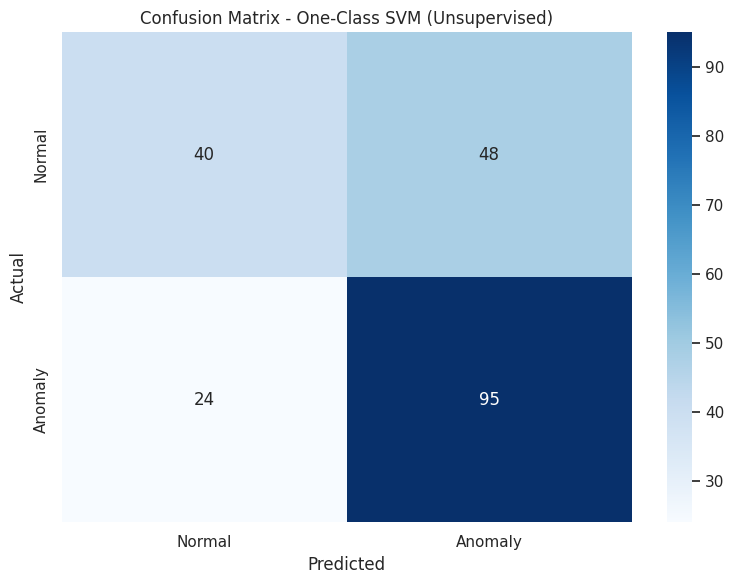

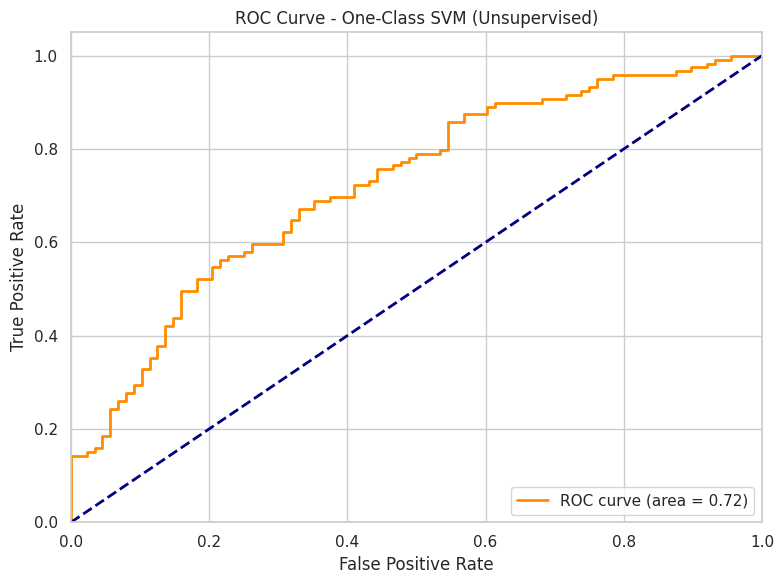

In [16]:
# 3.2 One-Class SVM
print("\nTraining One-Class SVM...")
# OneClassSVM's nu parameter is the upper bound on the fraction of training errors
# and the lower bound of the fraction of support vectors, so it should be in (0, 1)
nu = min(max(0.01, contamination), 0.99)
print(f"Using nu value for OneClassSVM: {nu:.4f}")

ocsvm_model = OneClassSVM(gamma='auto', nu=nu)
ocsvm_model.fit(X_train_scaled)

# Predict on test set
ocsvm_pred = (ocsvm_model.predict(X_test_scaled) == -1).astype(int)
ocsvm_score = -ocsvm_model.decision_function(X_test_scaled)  # Negative of the decision function

# Evaluate
ocsvm_metrics = evaluate_model(y_test, ocsvm_pred, ocsvm_score, "One-Class SVM (Unsupervised)", results_df, save_results=True)
results.append(("One-Class SVM (Unsupervised)", *ocsvm_metrics))


#### Local Outlier Factor (LOF)

LOF detects anomalies by comparing the **local density** of a point to that of its neighbors.

Points that reside in **sparser regions** relative to their surroundings are flagged as outliers.

It is sensitive to the number of neighbors and to the contamination parameter.  
We use `novelty=True` to enable scoring on new, unseen test data.

<br>



Training Local Outlier Factor...

Local Outlier Factor (Unsupervised) Performance:
Precision: 0.6779
Recall: 0.8487
F1 Score: 0.7537


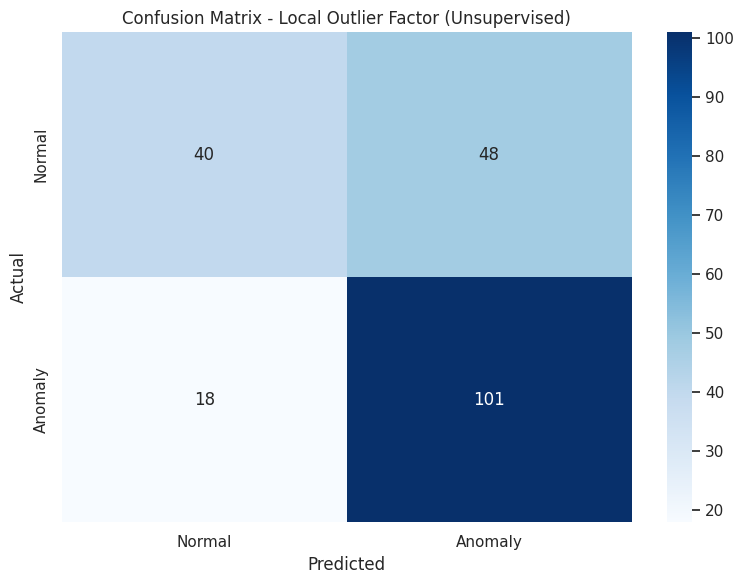

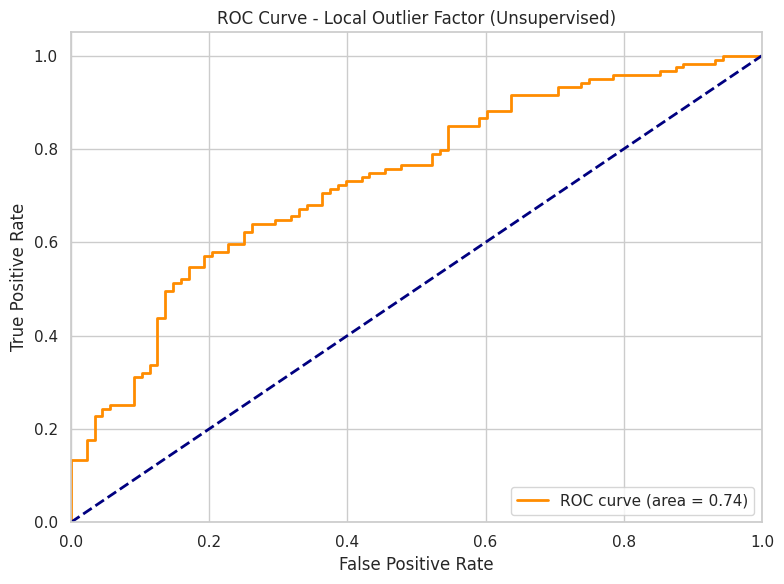

In [17]:
# 3.3 Local Outlier Factor
print("\nTraining Local Outlier Factor...")
# LOF also has a contamination parameter with the same constraints as Isolation Forest
lof_model = LocalOutlierFactor(n_neighbors=48, contamination=contamination, novelty=True)
lof_model.fit(X_train_scaled)

# Predict on test set
lof_pred = (lof_model.predict(X_test_scaled) == -1).astype(int)
lof_score = -lof_model.decision_function(X_test_scaled)  # Negative of the decision function

# Evaluate
lof_metrics = evaluate_model(y_test, lof_pred, lof_score, "Local Outlier Factor (Unsupervised)", results_df, save_results=True)
results.append(("Local Outlier Factor (Unsupervised)", *lof_metrics))


**OPTUNA**

We use now an automated hyperparameter tuning to improve the performance of the *LocalOutlierFactor* model, which was the one with the higher metrics. We specifically utilize the **optuna library** to search for the optimal value for the n_neighbors parameter, which is a key setting for this algorithm.

We find the optimal number of *n_neighbors* to be *48*, which increases the F1 score from  0.7444  to  **0.7576**

[I 2025-11-24 14:52:12,563] A new study created in memory with name: no-name-9382a41c-76e6-4cec-a444-1fe215ce93a1



Local Outlier Factor (Unsupervised) Performance:
Precision: 0.6667
Recall: 0.8235
F1 Score: 0.7368


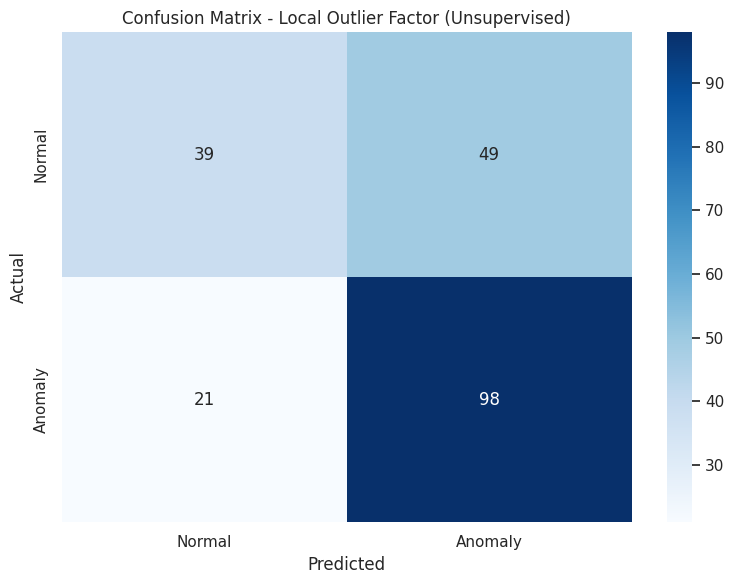

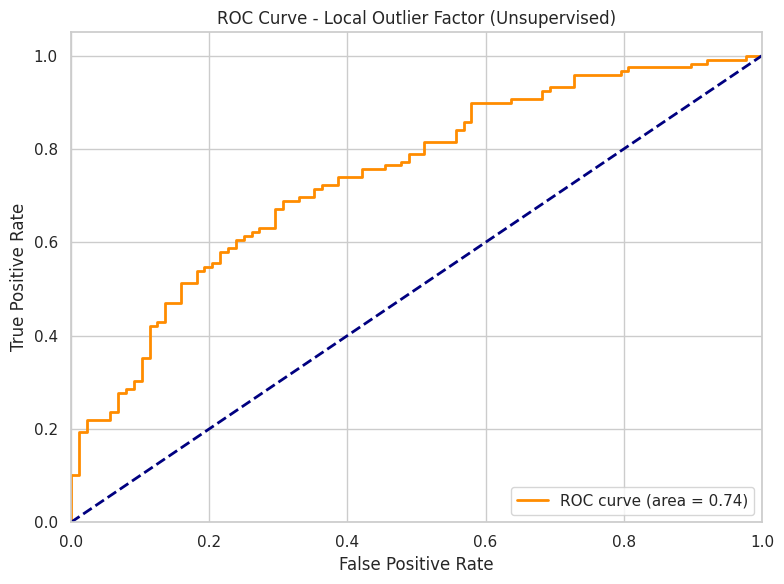

[I 2025-11-24 14:52:13,740] Trial 0 finished with value: 0.8235294117647058 and parameters: {'n_neighbors': 15}. Best is trial 0 with value: 0.8235294117647058.



Local Outlier Factor (Unsupervised) Performance:
Precision: 0.6689
Recall: 0.8319
F1 Score: 0.7416


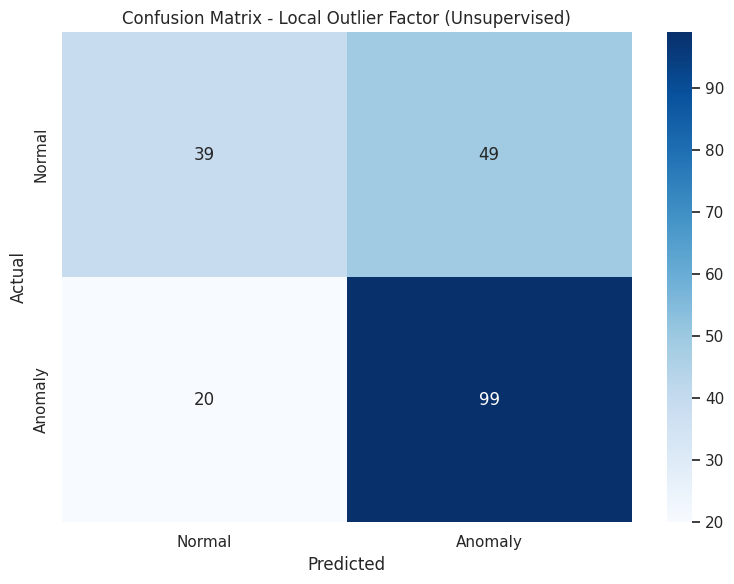

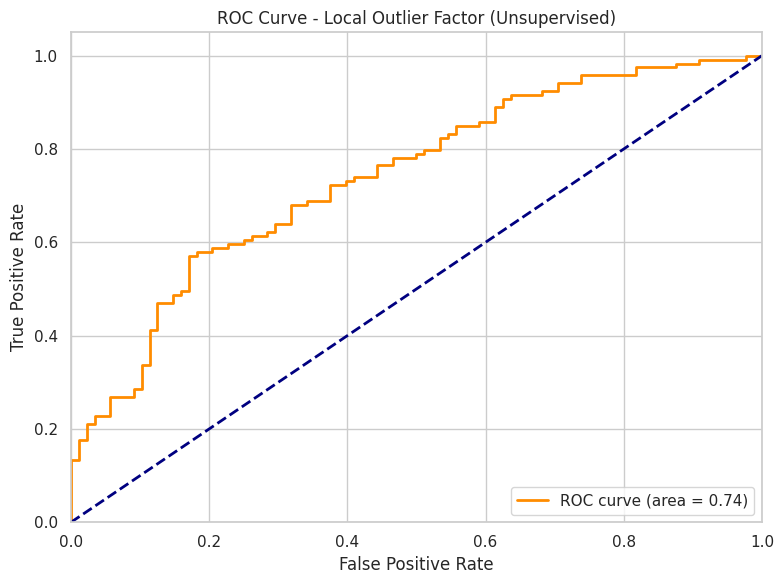

[I 2025-11-24 14:52:14,593] Trial 1 finished with value: 0.8319327731092437 and parameters: {'n_neighbors': 27}. Best is trial 1 with value: 0.8319327731092437.



Local Outlier Factor (Unsupervised) Performance:
Precision: 0.6689
Recall: 0.8319
F1 Score: 0.7416


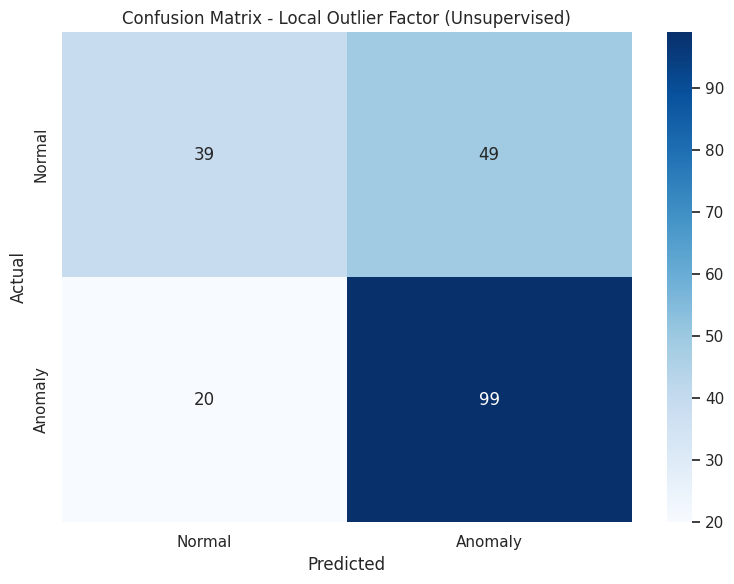

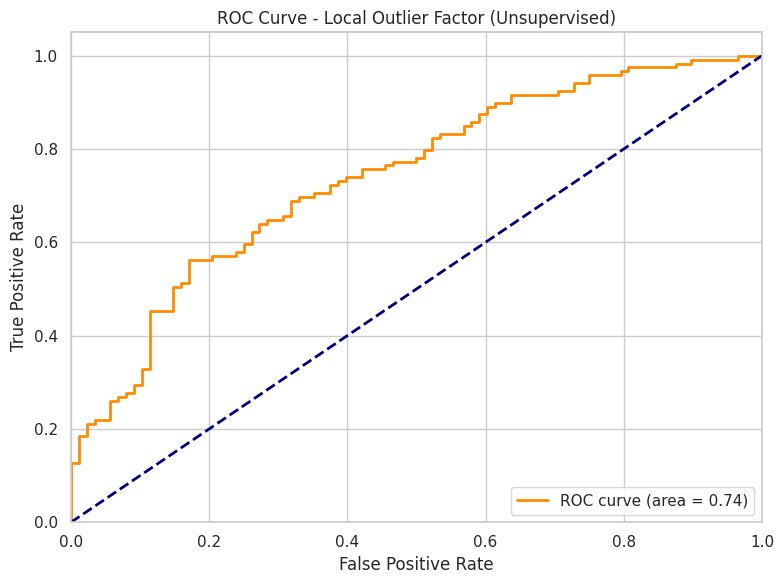

[I 2025-11-24 14:52:15,524] Trial 2 finished with value: 0.8319327731092437 and parameters: {'n_neighbors': 21}. Best is trial 1 with value: 0.8319327731092437.



Local Outlier Factor (Unsupervised) Performance:
Precision: 0.6779
Recall: 0.8487
F1 Score: 0.7537


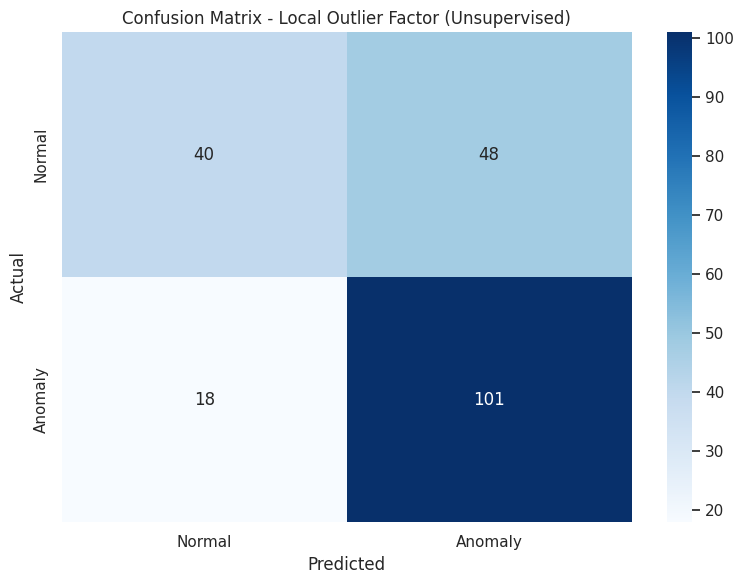

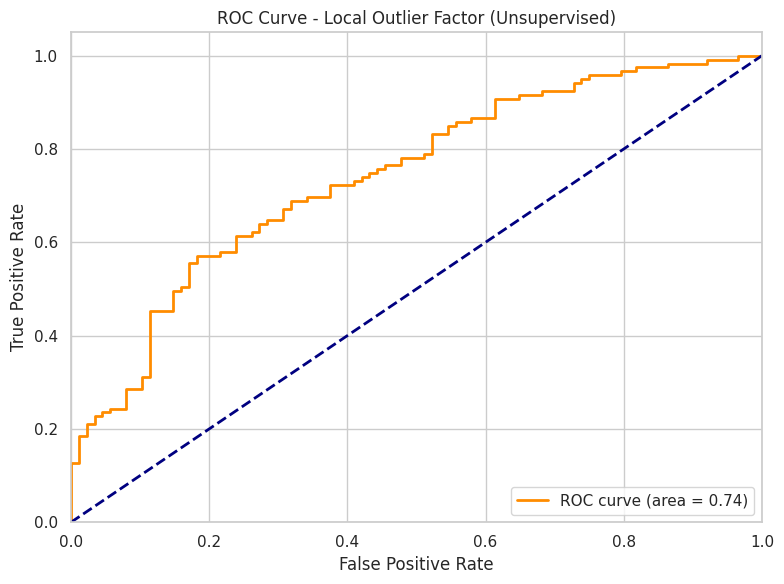

[I 2025-11-24 14:52:16,273] Trial 3 finished with value: 0.8487394957983193 and parameters: {'n_neighbors': 22}. Best is trial 3 with value: 0.8487394957983193.



Local Outlier Factor (Unsupervised) Performance:
Precision: 0.6622
Recall: 0.8235
F1 Score: 0.7341


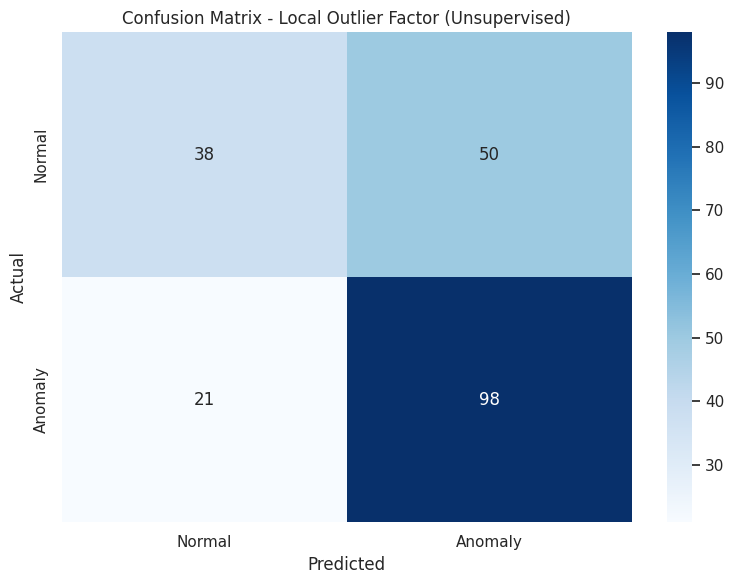

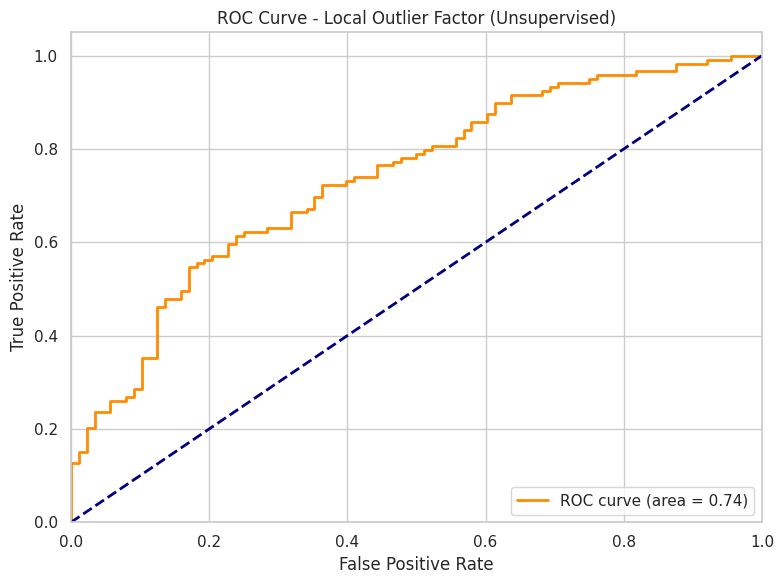

[I 2025-11-24 14:52:17,174] Trial 4 finished with value: 0.8235294117647058 and parameters: {'n_neighbors': 32}. Best is trial 3 with value: 0.8487394957983193.



Local Outlier Factor (Unsupervised) Performance:
Precision: 0.6735
Recall: 0.8319
F1 Score: 0.7444


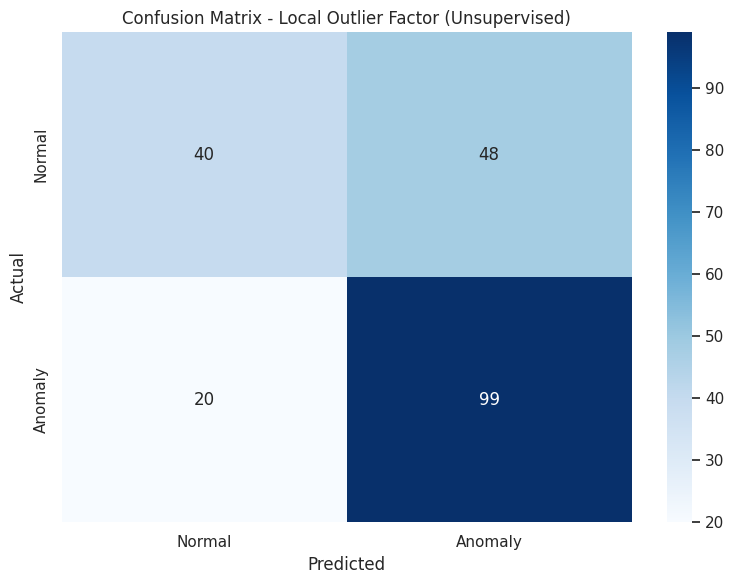

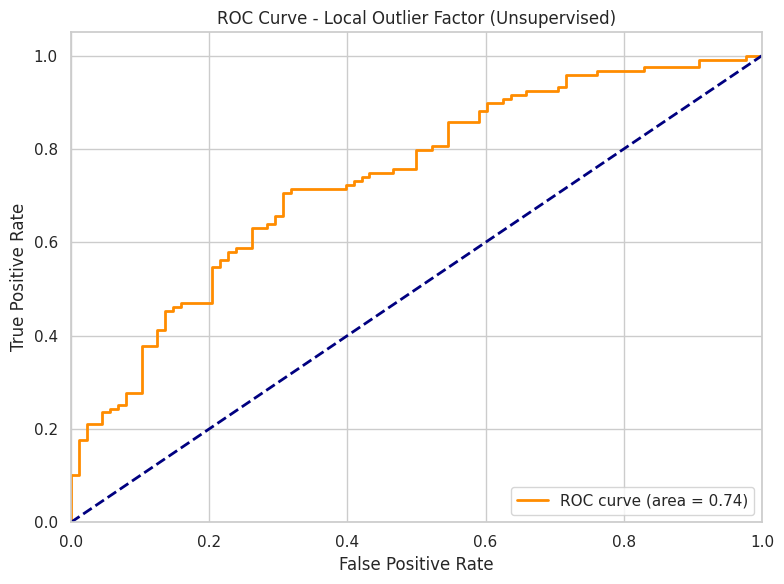

[I 2025-11-24 14:52:17,959] Trial 5 finished with value: 0.8319327731092437 and parameters: {'n_neighbors': 11}. Best is trial 3 with value: 0.8487394957983193.



Local Outlier Factor (Unsupervised) Performance:
Precision: 0.6667
Recall: 0.8403
F1 Score: 0.7435


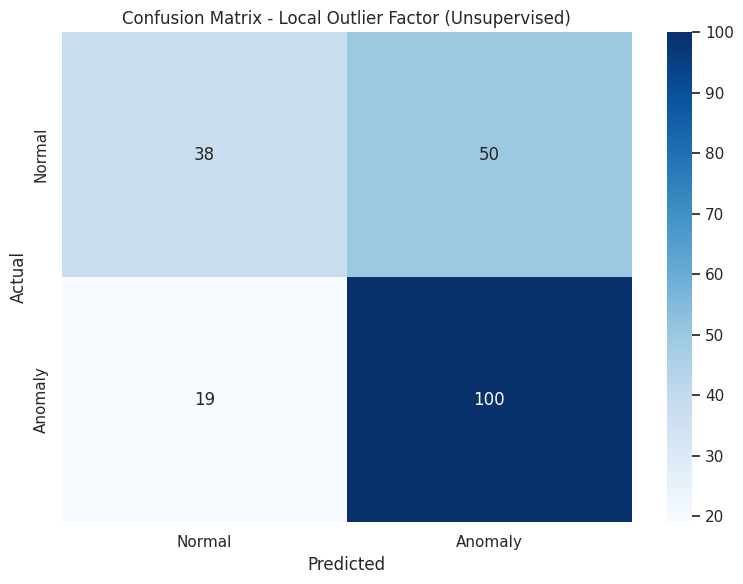

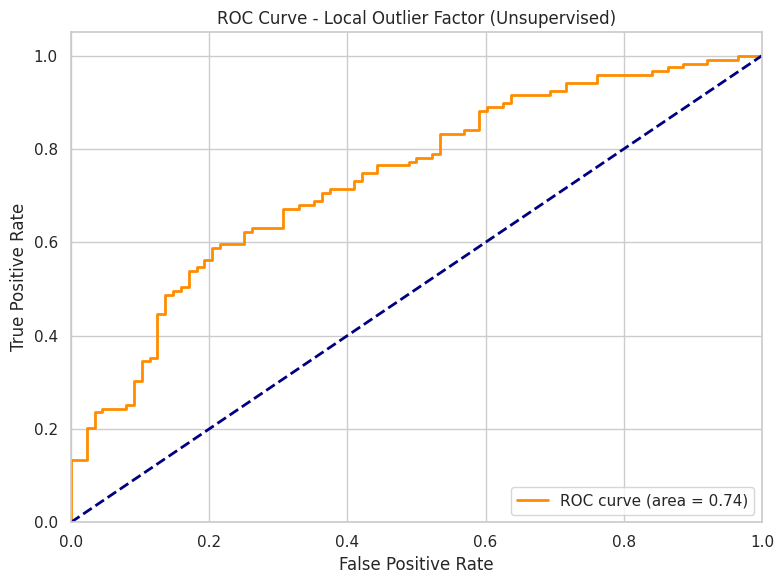

[I 2025-11-24 14:52:18,949] Trial 6 finished with value: 0.8403361344537815 and parameters: {'n_neighbors': 40}. Best is trial 3 with value: 0.8487394957983193.



Local Outlier Factor (Unsupervised) Performance:
Precision: 0.6712
Recall: 0.8235
F1 Score: 0.7396


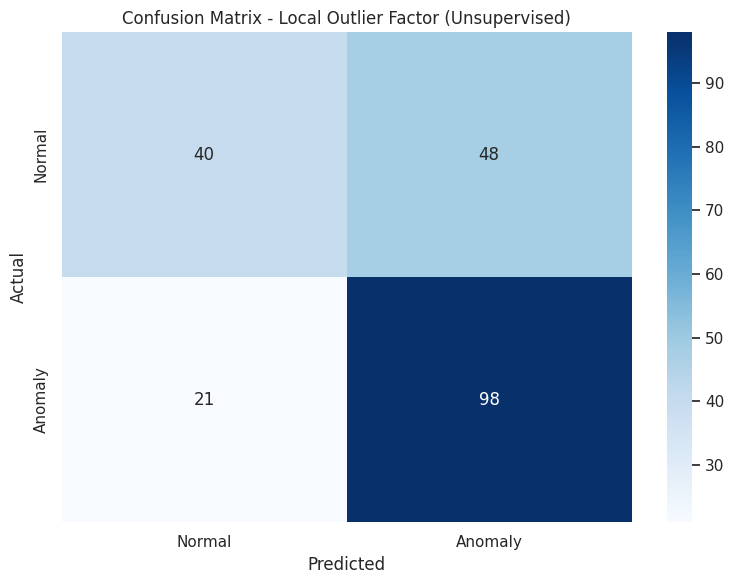

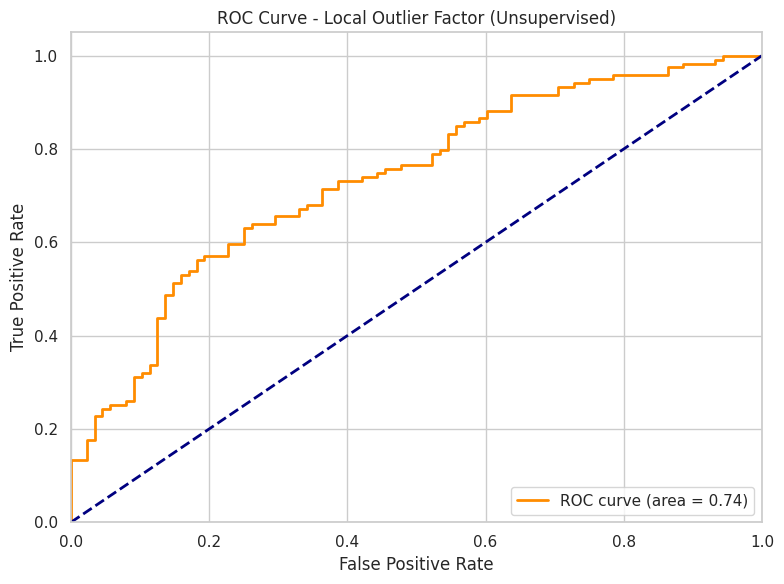

[I 2025-11-24 14:52:19,831] Trial 7 finished with value: 0.8235294117647058 and parameters: {'n_neighbors': 49}. Best is trial 3 with value: 0.8487394957983193.



Local Outlier Factor (Unsupervised) Performance:
Precision: 0.6622
Recall: 0.8235
F1 Score: 0.7341


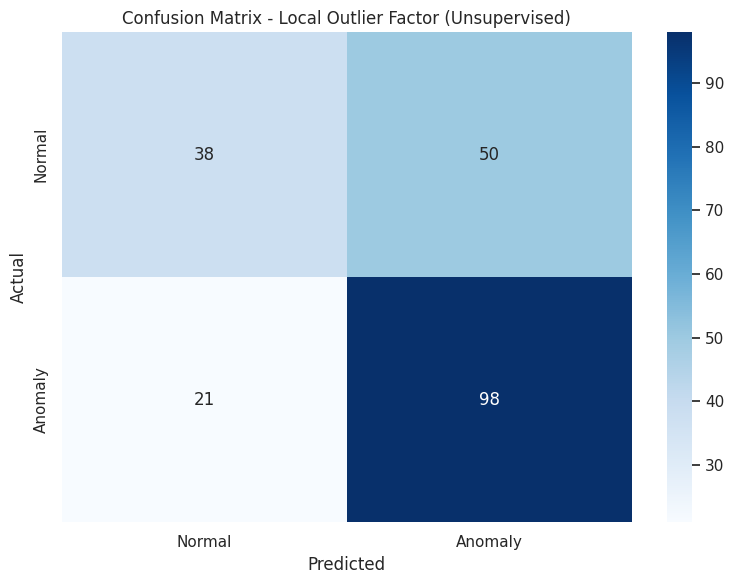

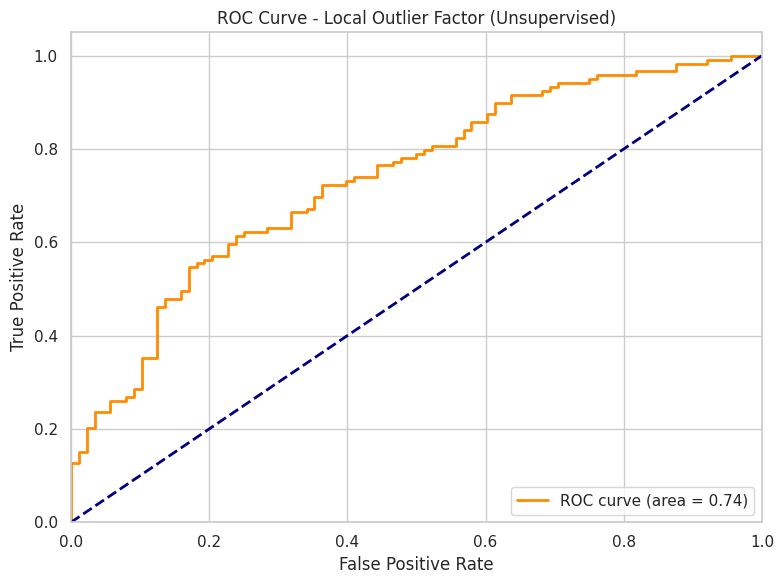

[I 2025-11-24 14:52:20,922] Trial 8 finished with value: 0.8235294117647058 and parameters: {'n_neighbors': 32}. Best is trial 3 with value: 0.8487394957983193.



Local Outlier Factor (Unsupervised) Performance:
Precision: 0.6735
Recall: 0.8319
F1 Score: 0.7444


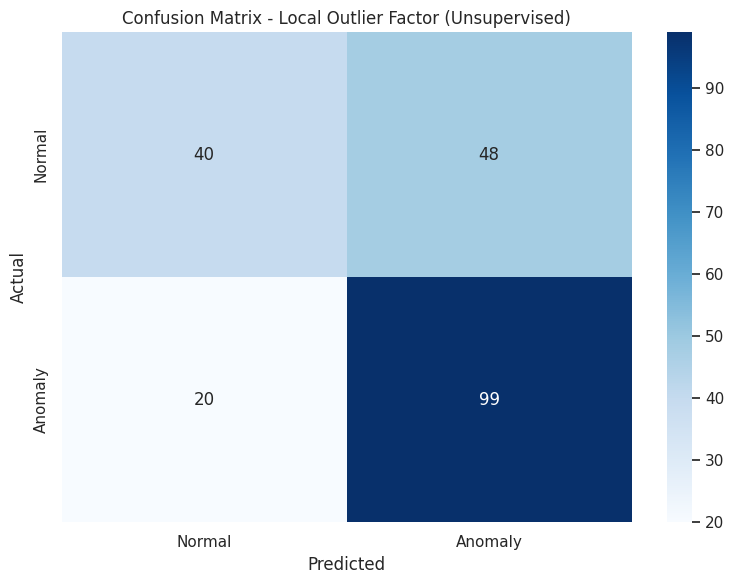

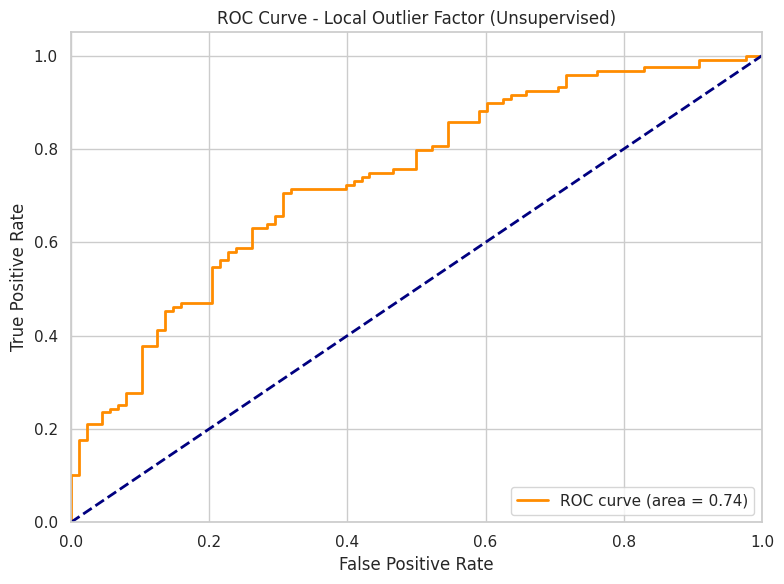

[I 2025-11-24 14:52:23,302] Trial 9 finished with value: 0.8319327731092437 and parameters: {'n_neighbors': 11}. Best is trial 3 with value: 0.8487394957983193.


Best hyperparameters: {'n_neighbors': 22}


In [18]:
# optuna for LOF:
import optuna
def objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 5, 50)
    lof_model = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, novelty=True)
    lof_model.fit(X_train_scaled)
    lof_pred = (lof_model.predict(X_test_scaled) == -1).astype(int)
    lof_score = -lof_model.decision_function(X_test_scaled)
    lof_metrics = evaluate_model(y_test, lof_pred, lof_score, "Local Outlier Factor (Unsupervised)")
    return lof_metrics[1]  # Return the F1 score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
best_params = study.best_params
print("Best hyperparameters:", best_params)

In [19]:
best_params = study.best_params
print("Best hyperparameters:", best_params)
print(f"f1_score: {lof_metrics[2]}")

Best hyperparameters: {'n_neighbors': 22}
f1_score: 0.753731343283582


#### Gaussian Mixture Model (GMM)

We now use a **2-component Gaussian Mixture Model** to estimate  the log-likelihood of each point under a flexible, **multimodal distribution**.

This approach can capture more complex patterns in the "normal" data,
compared to a single Gaussian (baseline model) which imposes an ellipsoidal structure. Points with **low likelihood** are flagged as anomalies.

We use the contamination rate from the validation set to define the decision threshold.

<br>


Training Gaussian Mixture Model...

Gaussian Mixture Model (Unsupervised) Performance:
Precision: 0.7227
Recall: 0.7227
F1 Score: 0.7227


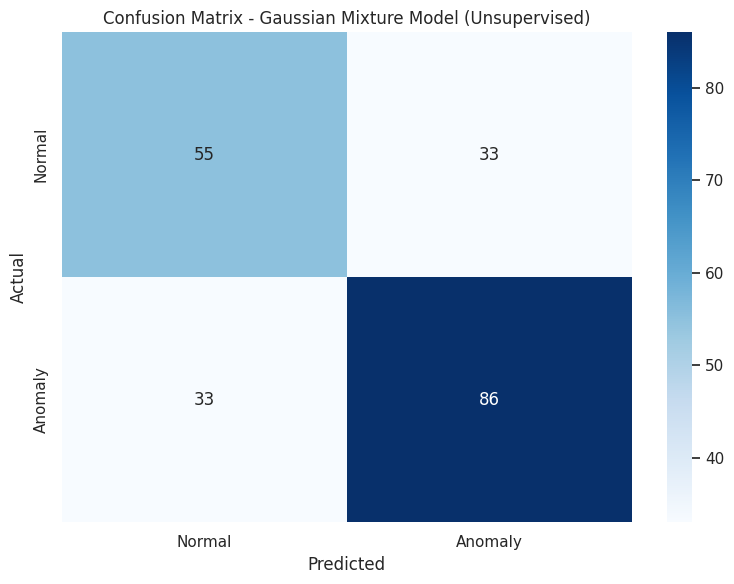

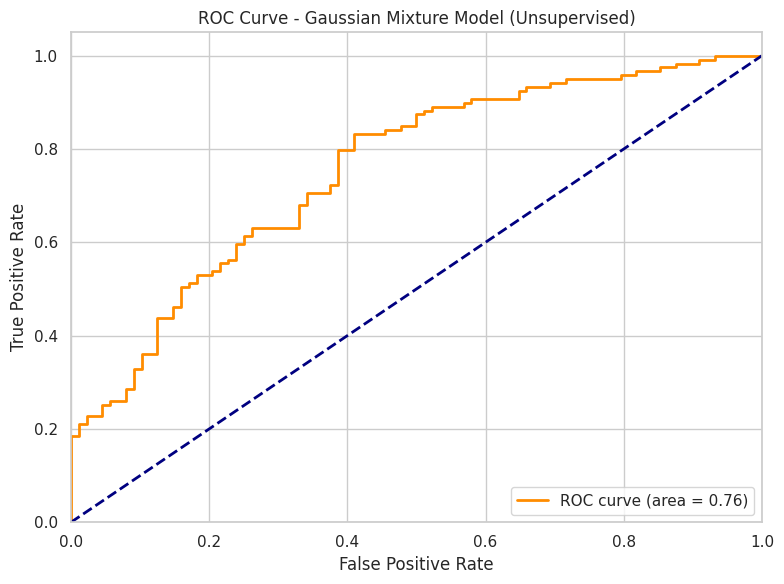

In [20]:
# 3.4 Gaussian Mixture Model - 2 components
from sklearn.mixture import GaussianMixture

print("\nTraining Gaussian Mixture Model...")
gmm_model = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_model.fit(X_train_scaled)

# Predict on test set
gmm_score = -gmm_model.score_samples(X_test_scaled)  # Negative log-likelihood as anomaly score
# For GMM we can use the raw contamination as it doesn't have the same constraints
threshold = np.percentile(gmm_score, 100 * (1 - raw_contamination))
gmm_pred = (gmm_score > threshold).astype(int)

# Evaluate
gmm_metrics = evaluate_model(y_test, gmm_pred, gmm_score, "Gaussian Mixture Model (Unsupervised)", results_df, save_results=True)
results.append(("Gaussian Mixture Model (Unsupervised)", *gmm_metrics))


###  4) Autoencoder & GAN for Anomaly Detection

An **Autoencoder** is a neural network that learns to compress and reconstruct data:

- **Encoder**: maps input to a lower-dimensional latent space.
- **Decoder**: reconstructs the original input from this compressed representation.

This architecture captures the structure of normal data, making it useful for anomaly detection.

In the following cells, we extend the Autoencoder into a **GAN-based model**. A **Generative Adversarial Network (GAN)** consists of:

- A **Generator** (here, the decoder from our autoencoder) that tries to produce realistic data.
- A **Discriminator** that learns to distinguish real data from generated data.

We first pretrained the Autoencoder briefly, then reuse its decoder as the Generator. We implement the Discriminator from scratch and train the GAN accordingly.

While not our best-performing method, we believe this approach has strong potential with further tuning.


In [21]:
# 4.  Deep Learning methods: Autoencoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print(f"Using device: {device}")

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
X_cv_tensor = torch.FloatTensor(X_cv_scaled).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Create DataLoaders
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)  # Input = Output for autoencoder
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# Define the Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim=16):
        super(Autoencoder, self).__init__()

        # Calculate layer sizes for a gradually decreasing architecture
        layer1_size = input_dim // 2
        layer2_size = layer1_size // 2

        # Ensure minimum size
        layer1_size = max(layer1_size, encoding_dim * 2)
        layer2_size = max(layer2_size, encoding_dim)

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, layer1_size),
            nn.BatchNorm1d(layer1_size),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(layer1_size, layer2_size),
            nn.BatchNorm1d(layer2_size),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(layer2_size, encoding_dim),
            nn.BatchNorm1d(encoding_dim),
            nn.ReLU(True)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, layer2_size),
            nn.BatchNorm1d(layer2_size),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(layer2_size, layer1_size),
            nn.BatchNorm1d(layer1_size),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(layer1_size, input_dim),
            nn.Tanh()  # Output activation to match standardized data range
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def encode(self, x):
        return self.encoder(x)

# Get input dimension from data
input_dim = X_train_scaled.shape[1]
print(f"Input dimension: {input_dim}")

# Create the autoencoder model
encoding_dim = min(16, input_dim // 4)  # Adjust encoding dimension based on input size
model = Autoencoder(input_dim, encoding_dim).to(device)
print(f"Encoding dimension: {encoding_dim}")
print(model)

# Define loss function and optimizer
#criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training function
def train_autoencoder(model, train_loader, num_epochs=100, patience=10):
    criterion = nn.MSELoss()
    # For early stopping
    best_loss = float('inf')
    no_improve_epochs = 0

    # For plotting
    train_losses = []

    print("Training autoencoder...")
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for data, _ in train_loader:
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, data)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * data.size(0)

        # Calculate epoch loss
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.6f}')

        # Early stopping
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            no_improve_epochs = 0
            # Save the best model
            torch.save(model.state_dict(), 'best_autoencoder.pth')
        else:
            no_improve_epochs += 1
            if no_improve_epochs >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load the best model
    model.load_state_dict(torch.load('best_autoencoder.pth'))

    # Plot training loss
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses)
    plt.title('Autoencoder Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.grid(True)
    plt.show()

    return model


Using device: cpu
Input dimension: 42
Encoding dimension: 10
Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=42, out_features=21, bias=True)
    (1): BatchNorm1d(21, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=21, out_features=10, bias=True)
    (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=10, out_features=2

###  Training with Early Stopping



In [22]:
print(input_dim, encoding_dim) #just to check dimension

42 10


Training autoencoder...
Epoch 10/104, Loss: 0.942329
Epoch 20/104, Loss: 0.844345
Epoch 30/104, Loss: 0.798002
Epoch 40/104, Loss: 0.771717
Epoch 50/104, Loss: 0.738854
Epoch 60/104, Loss: 0.731596
Epoch 70/104, Loss: 0.737884
Epoch 80/104, Loss: 0.730934
Epoch 90/104, Loss: 0.714550
Epoch 100/104, Loss: 0.721247


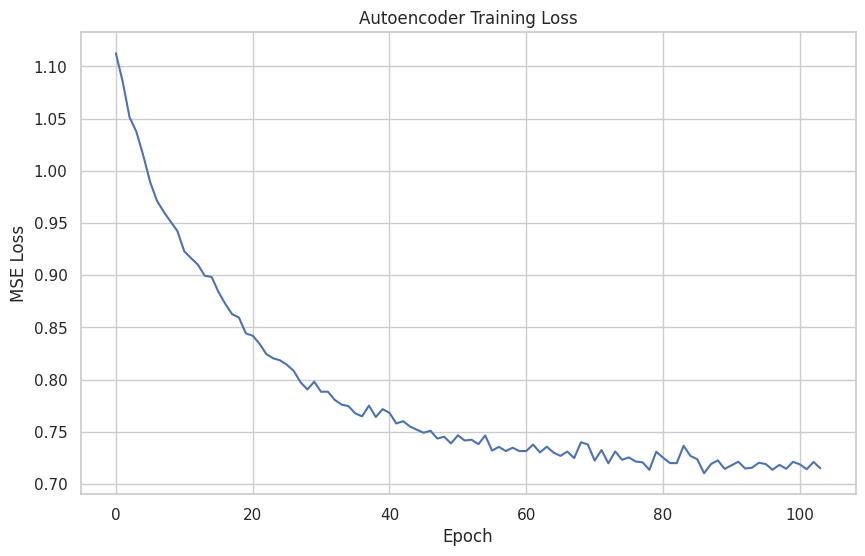

In [23]:
model = train_autoencoder(model, train_loader, num_epochs=104, patience=32)
generator = model.decoder
class Discriminator(nn.Module):
    def __init__(self, input_dim, dropout=0.3):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(dropout),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(dropout),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output probability (real or fake)
        )
    def forward(self, x):
            return self.main(x)



In [24]:
discriminator = Discriminator(input_dim=input_dim, dropout=0.3).to(device)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002)
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002)
#criterion = nn.BCELoss()
num_epochs = 100
latent_dim = encoding_dim
#ok now we have to train the discriminator:
def training_discriminator(num_epochs=100):
  criterion = nn.BCELoss()
  for epoch in range(num_epochs):
      for real_samples, _ in train_loader:
          real_samples = real_samples.view(real_samples.size(0), -1).to(device)
          batch_size = real_samples.size(0)

          # === Train Discriminator ===
          real_labels = torch.ones(batch_size, 1).to(device)
          fake_labels = torch.zeros(batch_size, 1).to(device)

          # Output del discriminator su dati reali
          outputs_real = discriminator(real_samples)
          loss_real = criterion(outputs_real, real_labels)

          # Genera dati fake usando il decoder (generator)
          noise = torch.randn(batch_size, latent_dim).to(device)
          fake_samples = generator(noise)

          # Output del discriminator su dati fake
          outputs_fake = discriminator(fake_samples.detach())
          loss_fake = criterion(outputs_fake, fake_labels)

          # Backpropagation totale discriminator
          loss_D = loss_real + loss_fake
          optimizer_D.zero_grad()
          loss_D.backward()
          optimizer_D.step()

          # === Train Generator ===
          outputs = discriminator(fake_samples)
          loss_G = criterion(outputs, real_labels)  # Vuole ingannare il discriminator
          optimizer_G.zero_grad()
          loss_G.backward()
          optimizer_G.step()
  return discriminator, generator









In [25]:
discriminator, generator = training_discriminator(num_epochs=100)
model.decoder = generator

cv_errors= [ 0.325458    0.31148058  0.98972857  0.67904174  0.36624798  0.46480355
  0.31922212  0.35230923  0.629807    0.44263208  1.0608736   0.2635737
  0.3419617   1.296399    0.22724424  0.31037945  1.569319    0.21292283
  0.94935787  0.62489134  0.31441814  0.66057426  1.4283499   1.4137843
  1.0231674   2.2434044   0.5203559   0.27594325  0.42679814  0.6601689
  0.40166637  0.50123     1.1734204   0.7868897   0.92938924  0.32548735
  0.7754929   0.7864623   0.8410568   0.57538015  0.63804007  0.27408022
  0.96048737  0.50756186  0.2502504   0.6807935   1.0752254   1.4127762
  0.8396272   0.7201146   0.44210026  0.75971395  1.5544392   0.8741627
  1.089882    0.51448643  0.35643637  0.593646    0.783075    1.1480513
  0.6664535   0.41010302  1.0828104   2.4846148   0.59316224  0.73475695
  1.1644588   1.1121142   0.70501703  0.48484454  0.9471108   0.3082272
  0.27519998  0.4230572   1.7025737   1.1174841   1.9934155   0.31497148
  0.68661696  0.69338924  0.89523715  0.7706637

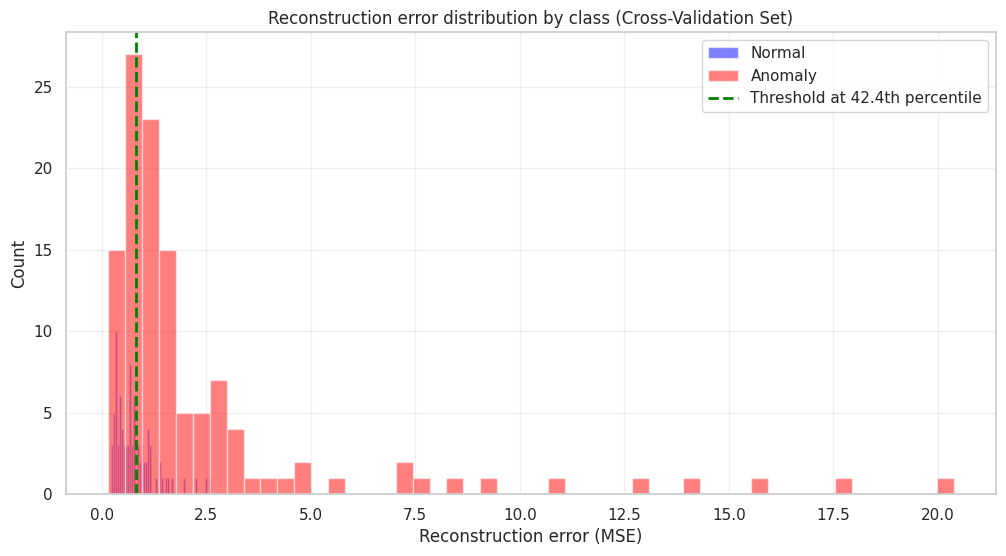

Threshold for anomaly detection: 0.810871


In [26]:
# Function to compute reconstruction error
def compute_reconstruction_error(model, data_tensor):
    model.eval()
    with torch.no_grad():
        reconstructions = model(data_tensor)
        # Compute MSE for each sample
        mse = ((reconstructions - data_tensor) ** 2).mean(dim=1).cpu().numpy()
    return mse

# Compute reconstruction errors
train_errors = compute_reconstruction_error(model, X_train_tensor)
cv_errors = compute_reconstruction_error(model, X_cv_tensor)
print(f"cv_errors= {cv_errors}")
test_errors = compute_reconstruction_error(model, X_test_tensor)

# Determine threshold for anomaly detection using cross-validation set
# We'll use the contamination rate from the cross-validation set
contamination = np.mean(y_cross_val)
print(f"Contamination rate from cross-validation set: {contamination:.4f}")

# Find the threshold that best separates normal and anomalous examples in the CV set
cv_errors_normal = cv_errors[y_cross_val == 0]
cv_errors_anomaly = cv_errors[y_cross_val == 1]

# Plot histogram of reconstruction errors by class
plt.figure(figsize=(12, 6))
plt.hist(cv_errors_normal, bins=50, alpha=0.5, label='Normal', color='blue')
plt.hist(cv_errors_anomaly, bins=50, alpha=0.5, label='Anomaly', color='red')
plt.axvline(x=np.percentile(cv_errors, 100 * (1 - contamination)),
            color='green', linestyle='dashed', linewidth=2,
            label=f'Threshold at {100 * (1 - contamination):.1f}th percentile')
plt.title('Reconstruction error distribution by class (Cross-Validation Set)')
plt.xlabel('Reconstruction error (MSE)')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Set threshold at the percentile corresponding to the contamination rate
threshold = np.percentile(cv_errors, 100 * (1 - contamination))
print(f"Threshold for anomaly detection: {threshold:.6f}")

# Make predictions on test set
y_pred = (test_errors > threshold).astype(int)




### Evaluation metrics

 In addition to the usual metrics, we show the plot with the **reconstruction error** for each point in the test set.

- Each dot is a data point.
- Color indicates the true label:  
  - 🔵 Blue for **normal**  
  - 🔴 Red for **anomalies**
- The green dashed line is the **threshold** used to classify a point as anomalous.

What does this chart tell us?

- Samples **above the threshold** are predicted as anomalies
- Samples **below** are classified as normal
- We can directly spot:
  - **False positives**: blue dots above the line
  - **False negatives**: red dots below the line

This is a simple but effective diagnostic tool to evaluate the classifier's behavior **based on its internal logic** (reconstruction error).  
It's also a sanity check: are anomalies really harder to reconstruct?

<br>

---



Autoencoder performance:
Precision: 0.7193
Recall: 0.6891
F1 Score: 0.7039


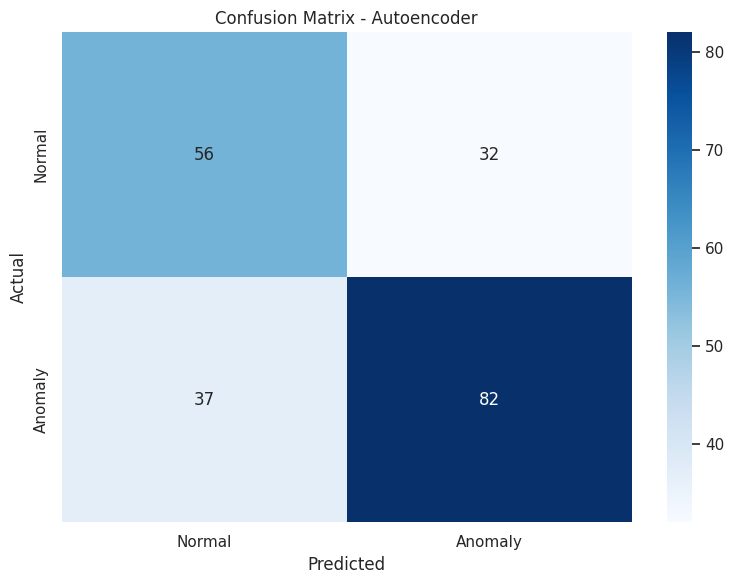

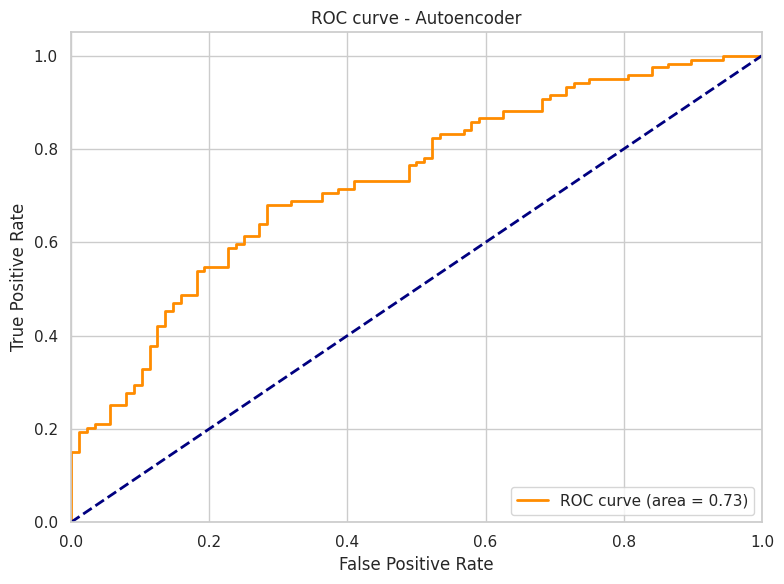

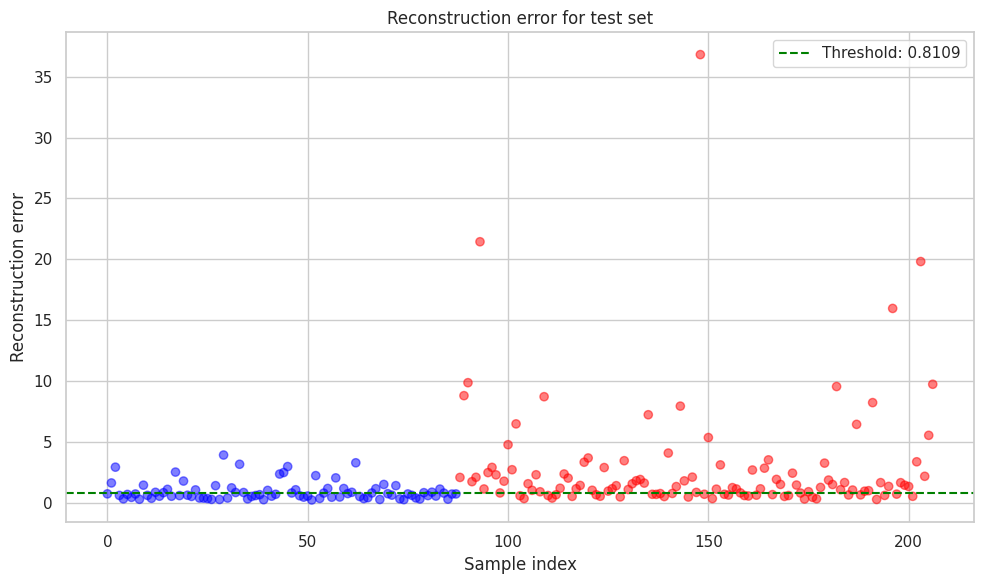


Performance comparison:
                                Model  Precision   Recall  F1 Score
  Local Outlier Factor (Unsupervised)   0.677852 0.848739  0.753731
                                  MVG   0.603093 0.983193  0.747604
      Isolation Forest (Unsupervised)   0.683824 0.781513  0.729412
         One-Class SVM (Unsupervised)   0.664336 0.798319  0.725191
Gaussian Mixture Model (Unsupervised)   0.722689 0.722689  0.722689
                                  GAN   0.719298 0.689076  0.703863
                     SVM (Supervised)   0.884058 0.512605  0.648936
           Random Forest (Supervised)   1.000000 0.025210  0.049180

Memento: Baseline model performance:
Precision: 0.6031
Recall: 0.9832
F1 Score: 0.7476


In [27]:
# Evaluate the autoencoder model
def evaluate_autoencoder(y_true, y_pred, reconstruction_errors, threshold):
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print("\nAutoencoder performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Anomaly'],
                yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Autoencoder')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, reconstruction_errors)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve - Autoencoder')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # Visualize reconstruction error distribution
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(reconstruction_errors)),
                reconstruction_errors,
                c=['blue' if label == 0 else 'red' for label in y_true],
                alpha=0.5)
    plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold: {threshold:.4f}')
    plt.title('Reconstruction error for test set')
    plt.xlabel('Sample index')
    plt.ylabel('Reconstruction error')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return precision, recall, f1, roc_auc


# Evaluate autoencoder performance
ae_metrics = evaluate_autoencoder(y_test, y_pred, test_errors, threshold)
results_df.loc[len(results_df)] = ["GAN", ae_metrics[0], ae_metrics[1], ae_metrics[2]]

# Print the results table
print("\nPerformance comparison:")
print(results_df.sort_values('F1 Score', ascending=False).to_string(index=False))

print("\nMemento: Baseline model performance:")
print(f"Precision: {MVG_precision:.4f}")
print(f"Recall: {MVG_recall:.4f}")
print(f"F1 Score: {MVG_f1:.4f}")


In [28]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

[I 2025-11-24 14:53:01,164] A new study created in memory with name: no-name-ad906047-6c82-40a0-a614-bf5e657aae1f


Training autoencoder...
Epoch 10/13, Loss: 1.137162


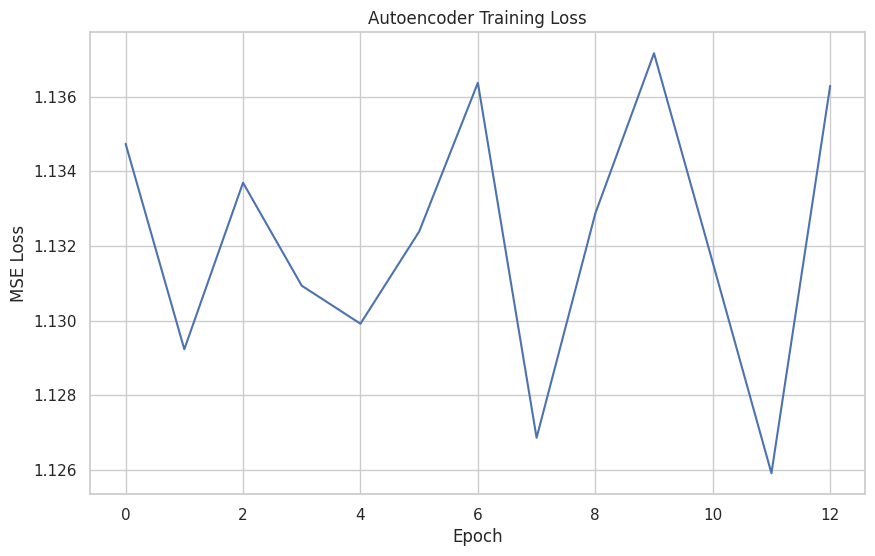

Threshold for anomaly detection: 1.156208

Autoencoder performance:
Precision: 0.7203
Recall: 0.7203
F1 Score: 0.7203


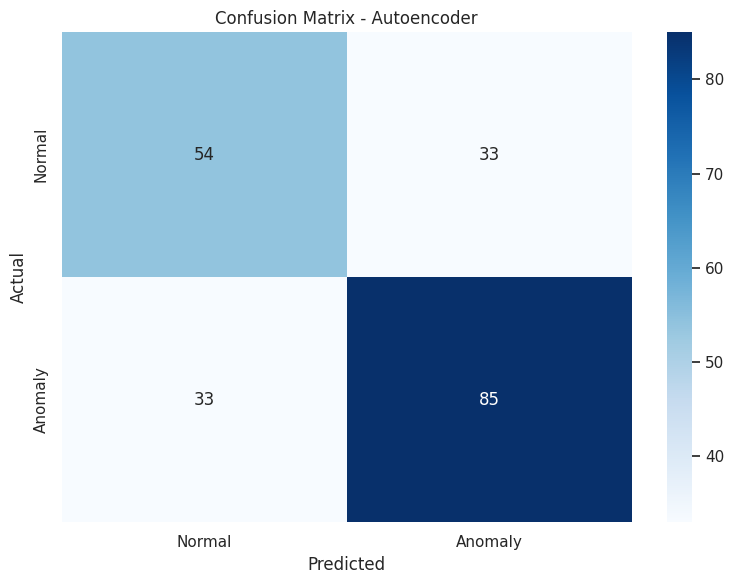

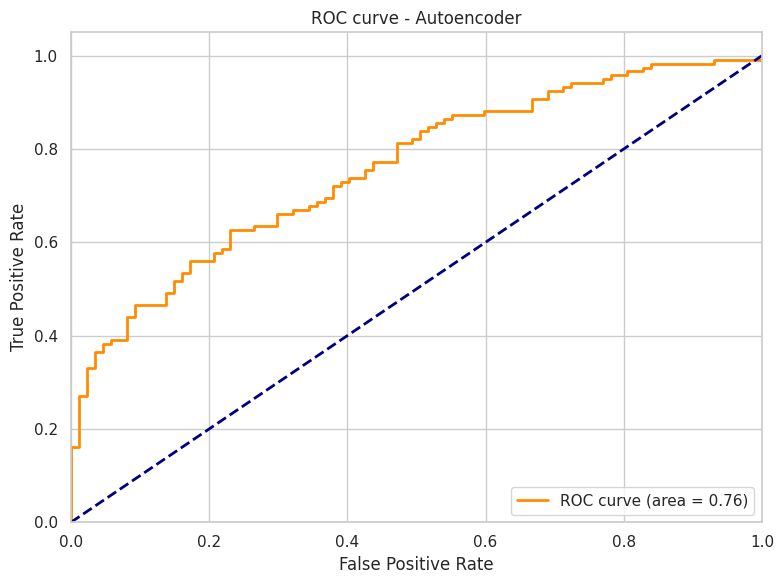

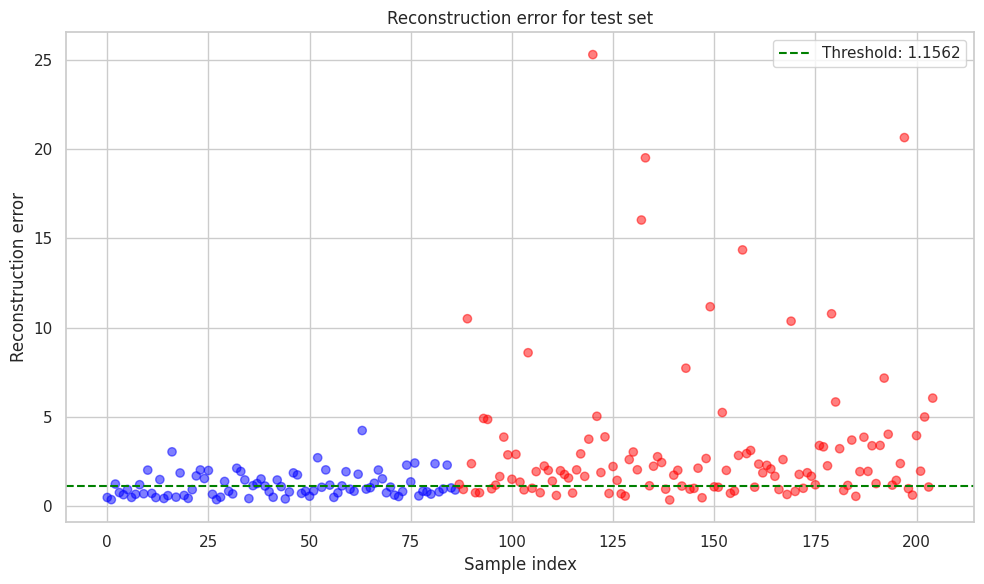

[I 2025-11-24 14:53:12,355] Trial 0 finished with value: 0.7203389830508474 and parameters: {'epochs': 13, 'patience': 7, 'dropout': 0.40461634003629265, 'encoding_dim': 98}. Best is trial 0 with value: 0.7203389830508474.


Training autoencoder...
Epoch 10/31, Loss: 1.138676
Early stopping at epoch 12


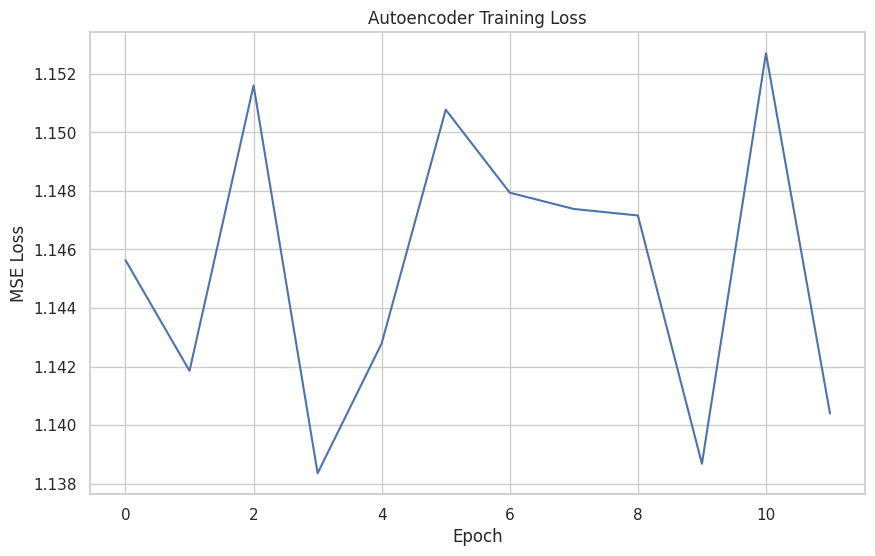

Threshold for anomaly detection: 1.157855

Autoencoder performance:
Precision: 0.7203
Recall: 0.7203
F1 Score: 0.7203


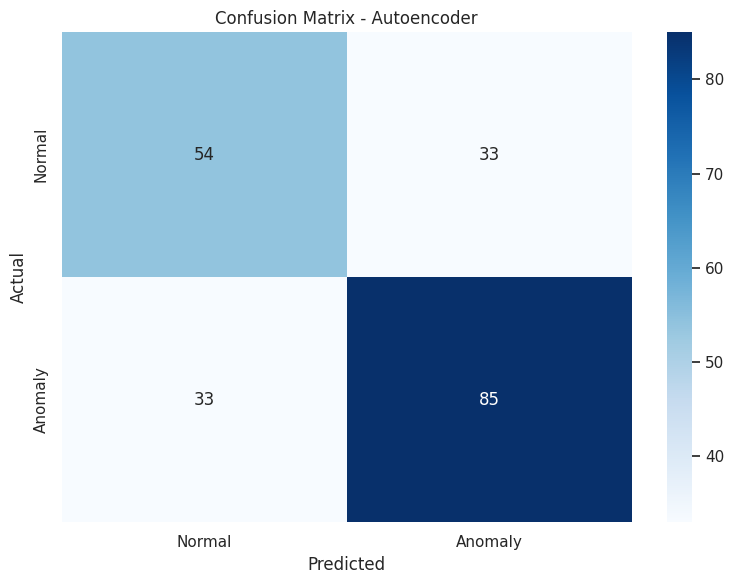

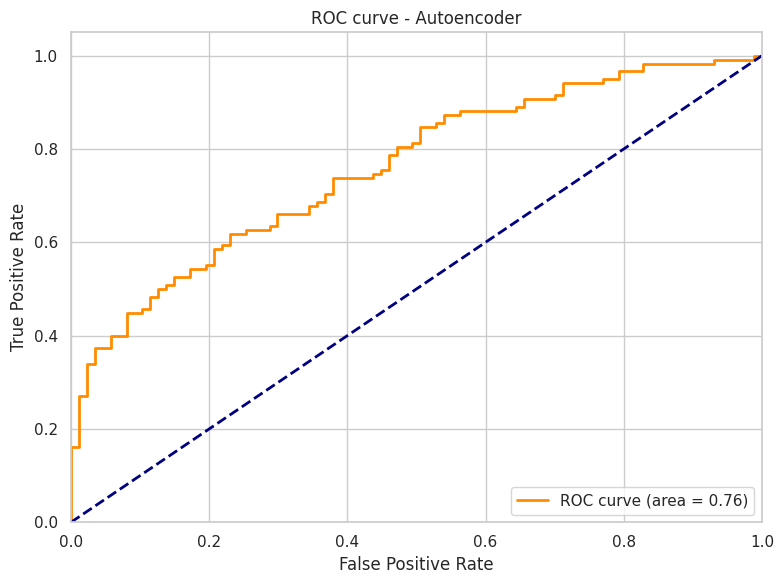

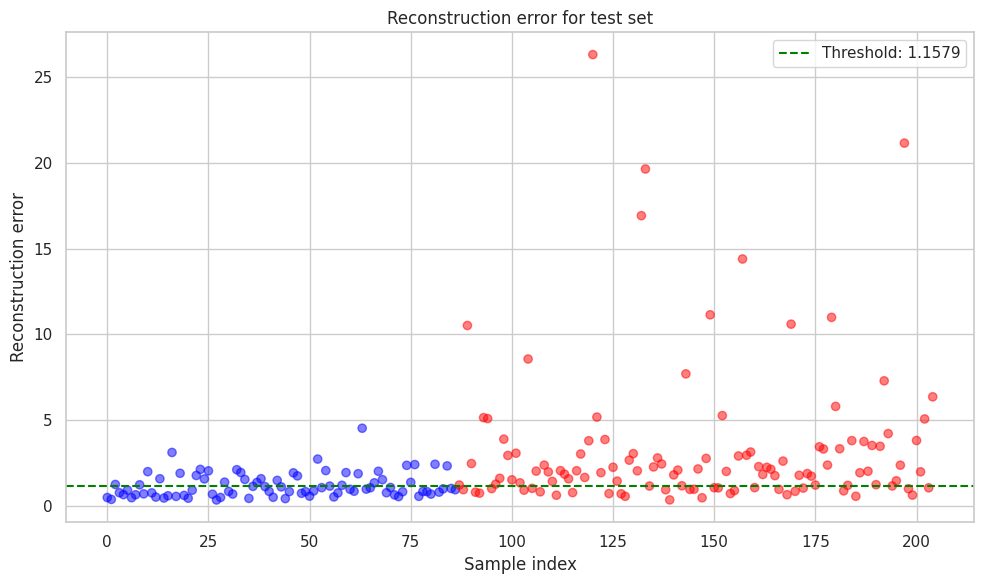

[I 2025-11-24 14:53:23,291] Trial 1 finished with value: 0.7203389830508474 and parameters: {'epochs': 31, 'patience': 8, 'dropout': 0.4199543075494231, 'encoding_dim': 84}. Best is trial 0 with value: 0.7203389830508474.


Training autoencoder...
Epoch 10/71, Loss: 1.132543
Early stopping at epoch 14


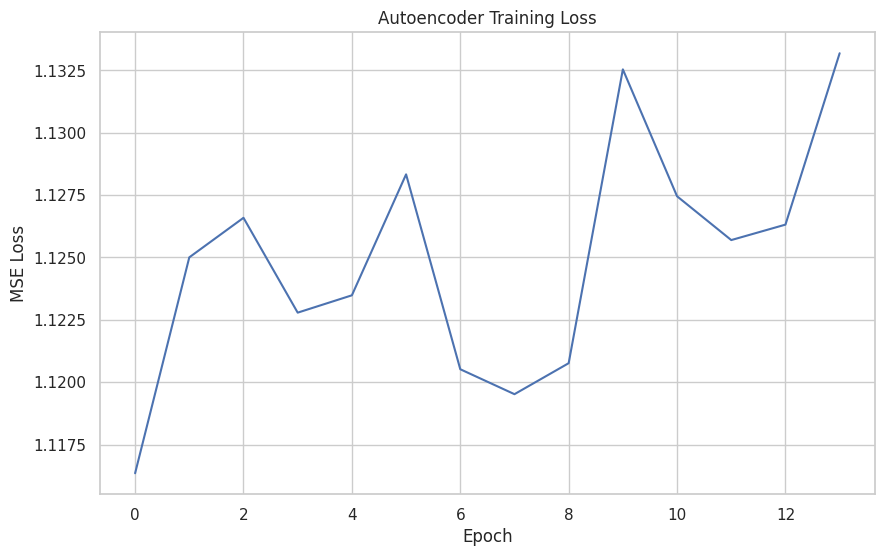

Threshold for anomaly detection: 1.166175

Autoencoder performance:
Precision: 0.7203
Recall: 0.7203
F1 Score: 0.7203


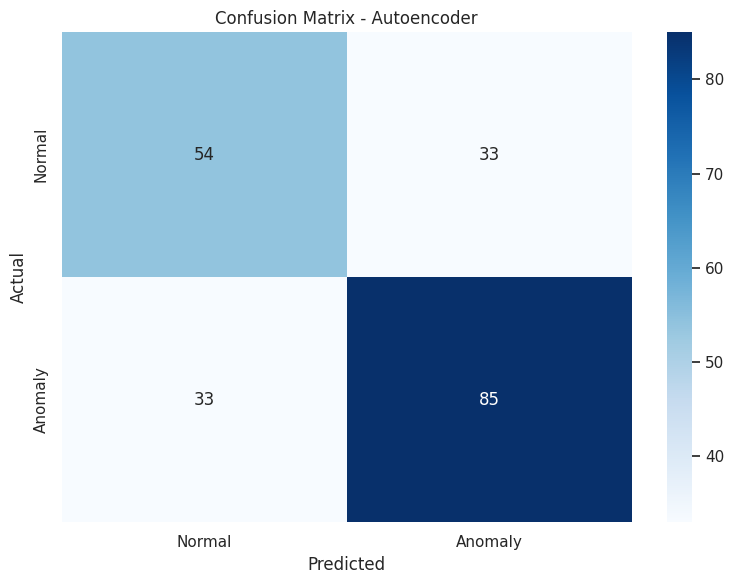

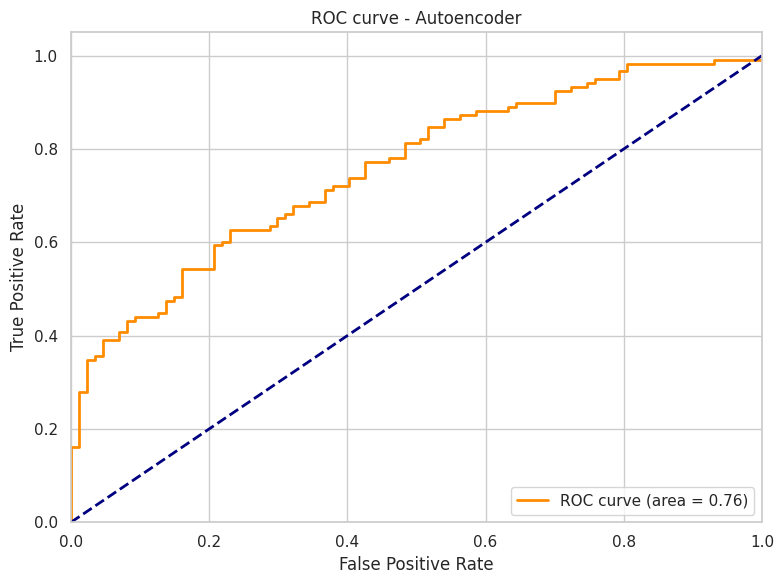

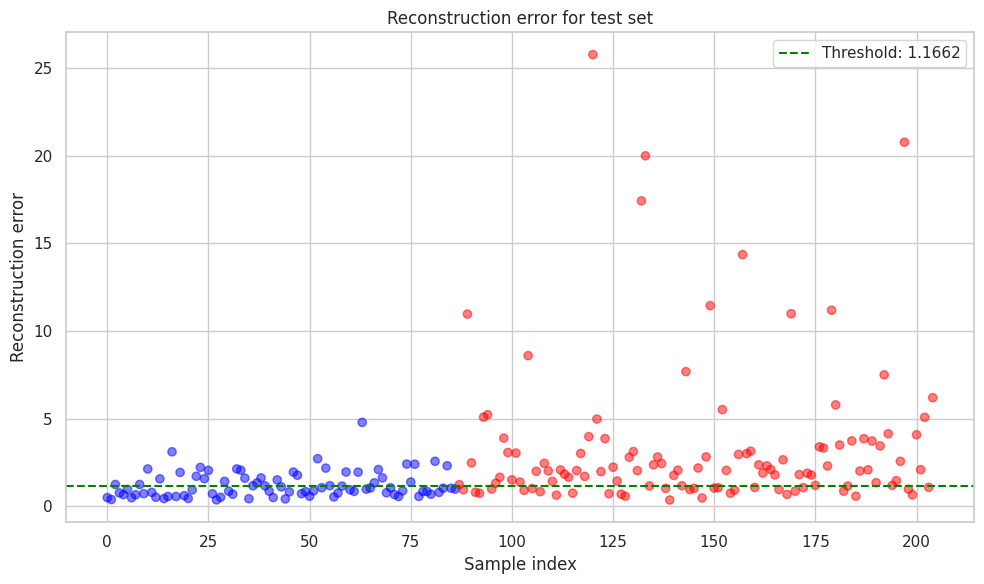

[I 2025-11-24 14:53:33,620] Trial 2 finished with value: 0.7203389830508474 and parameters: {'epochs': 71, 'patience': 13, 'dropout': 0.37039059134071617, 'encoding_dim': 66}. Best is trial 0 with value: 0.7203389830508474.


Training autoencoder...
Epoch 10/23, Loss: 1.130786
Epoch 20/23, Loss: 1.134270
Early stopping at epoch 22


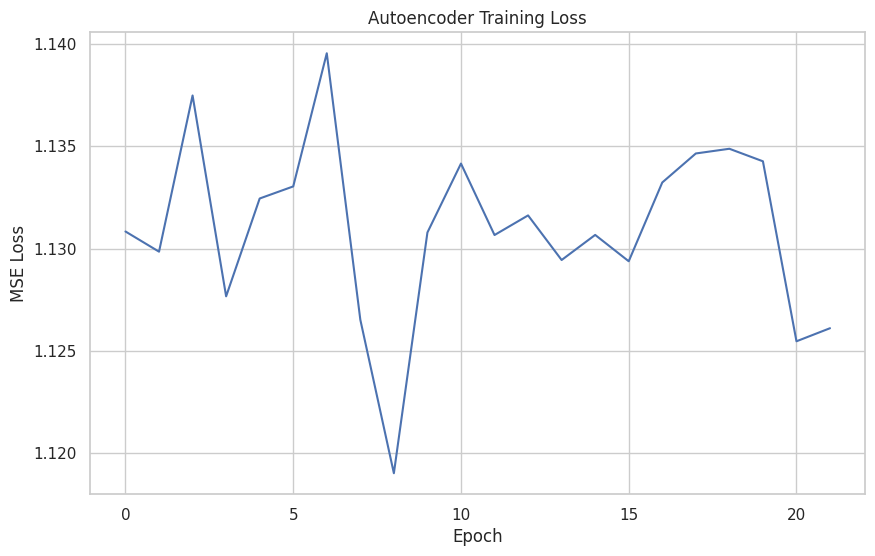

Threshold for anomaly detection: 1.206611

Autoencoder performance:
Precision: 0.7203
Recall: 0.7203
F1 Score: 0.7203


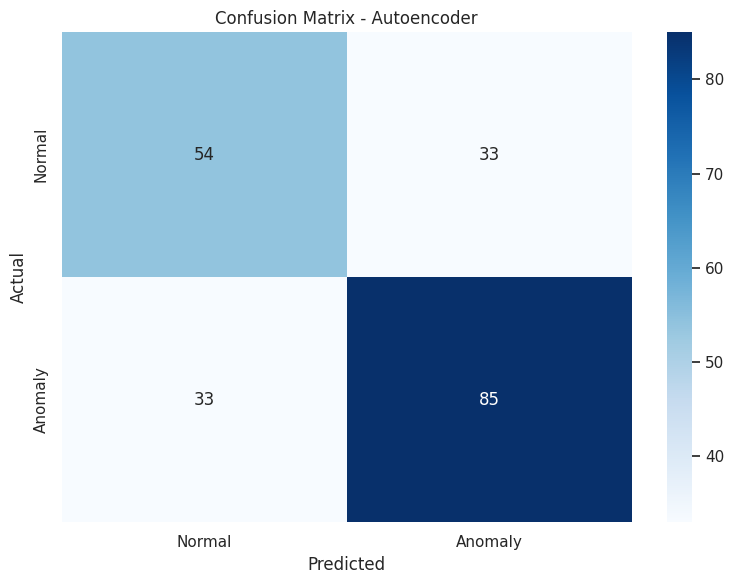

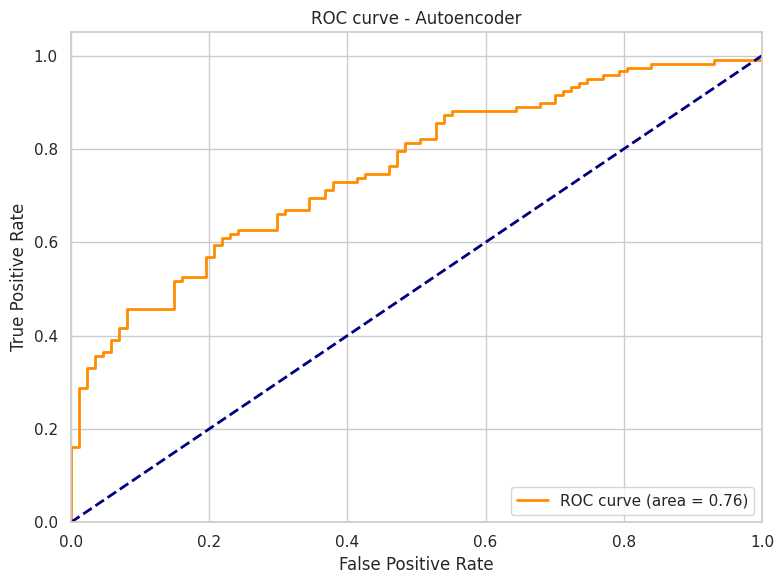

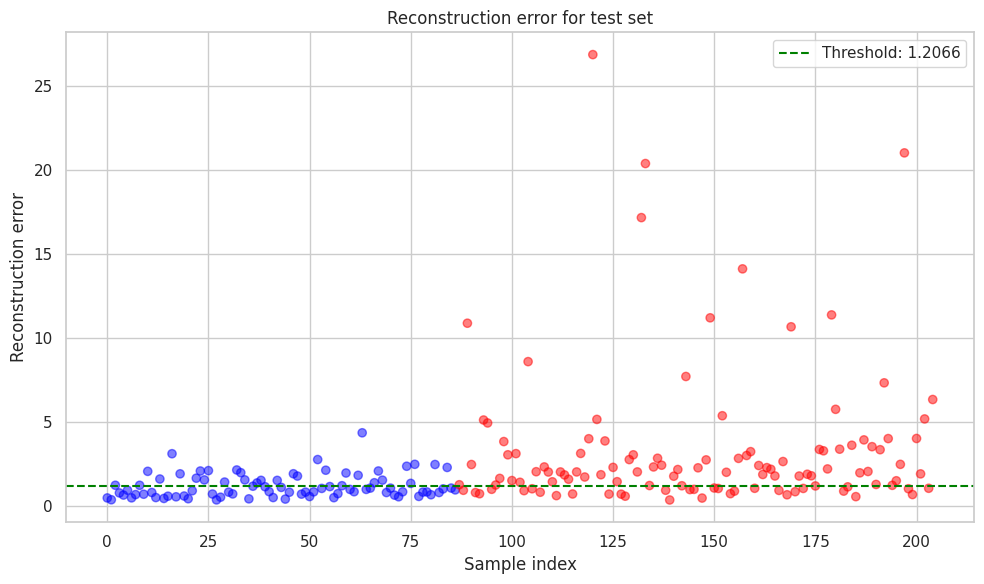

[I 2025-11-24 14:53:44,305] Trial 3 finished with value: 0.7203389830508474 and parameters: {'epochs': 23, 'patience': 13, 'dropout': 0.2023599716994153, 'encoding_dim': 65}. Best is trial 0 with value: 0.7203389830508474.


Training autoencoder...
Epoch 10/80, Loss: 1.135941
Epoch 20/80, Loss: 1.142347
Early stopping at epoch 28


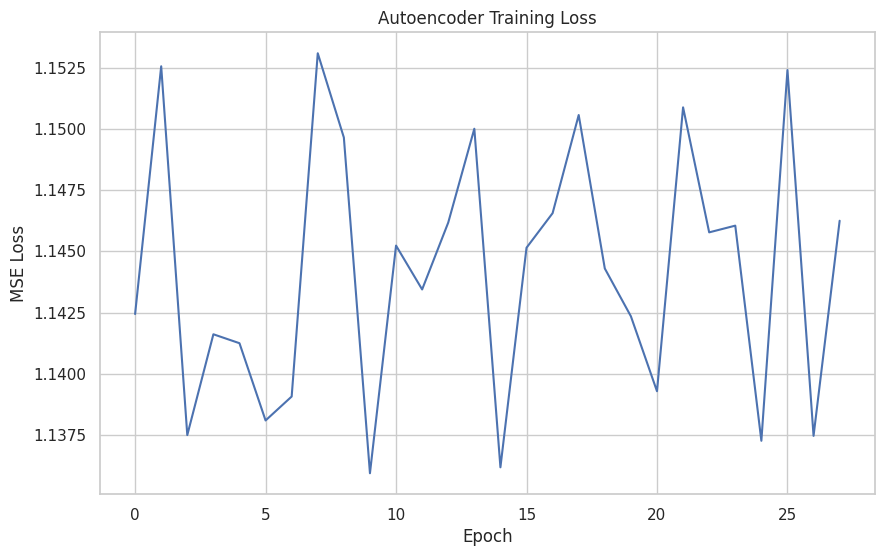

Threshold for anomaly detection: 1.165714

Autoencoder performance:
Precision: 0.7203
Recall: 0.7203
F1 Score: 0.7203


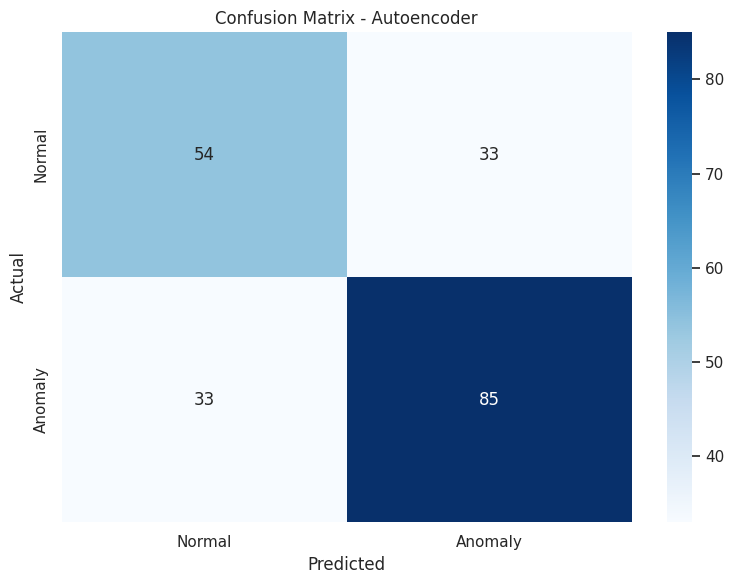

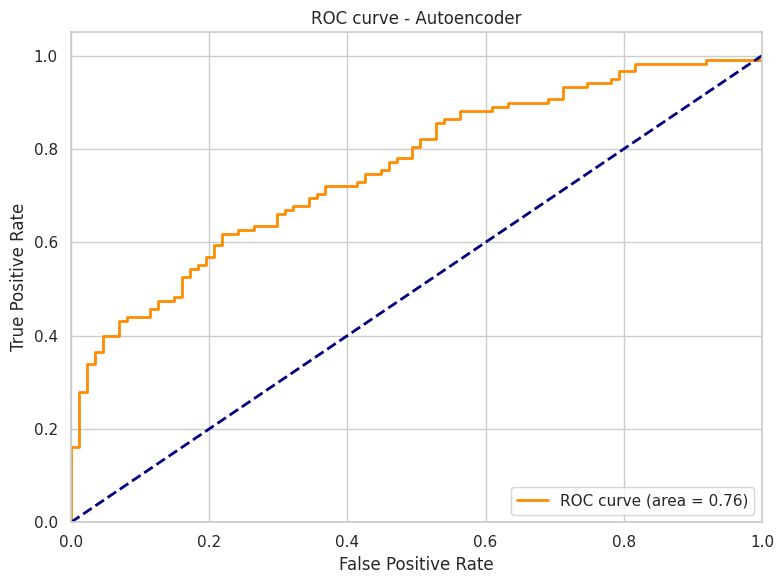

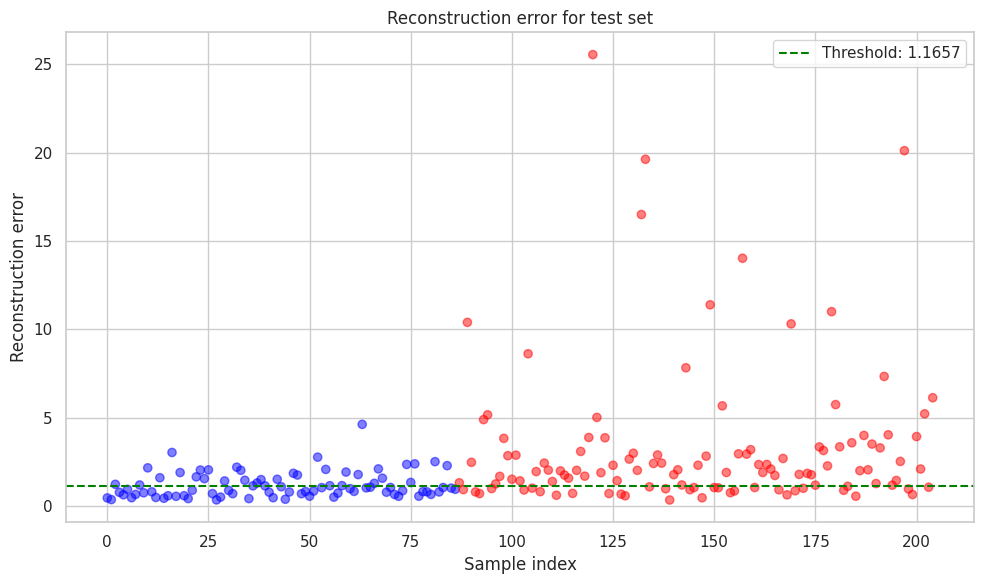

[I 2025-11-24 14:53:55,638] Trial 4 finished with value: 0.7203389830508474 and parameters: {'epochs': 80, 'patience': 18, 'dropout': 0.2920383654766552, 'encoding_dim': 51}. Best is trial 0 with value: 0.7203389830508474.


Training autoencoder...
Early stopping at epoch 6


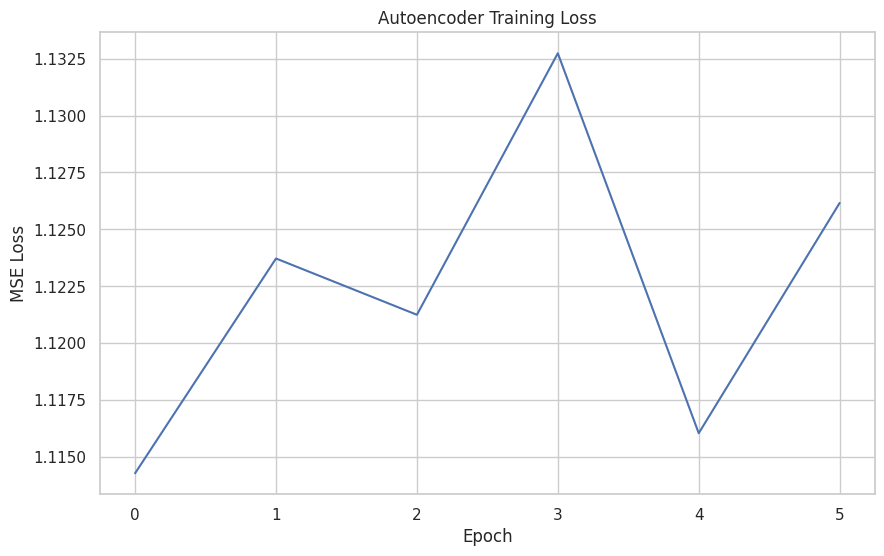

Threshold for anomaly detection: 1.119539

Autoencoder performance:
Precision: 0.7203
Recall: 0.7203
F1 Score: 0.7203


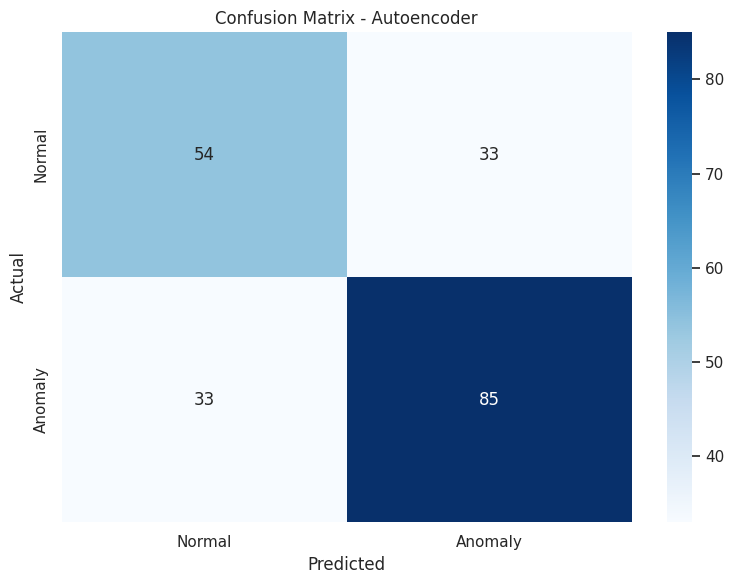

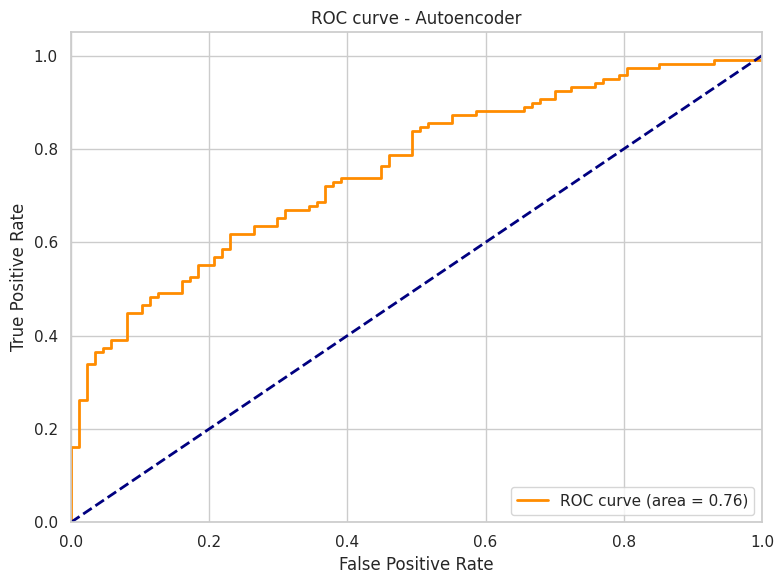

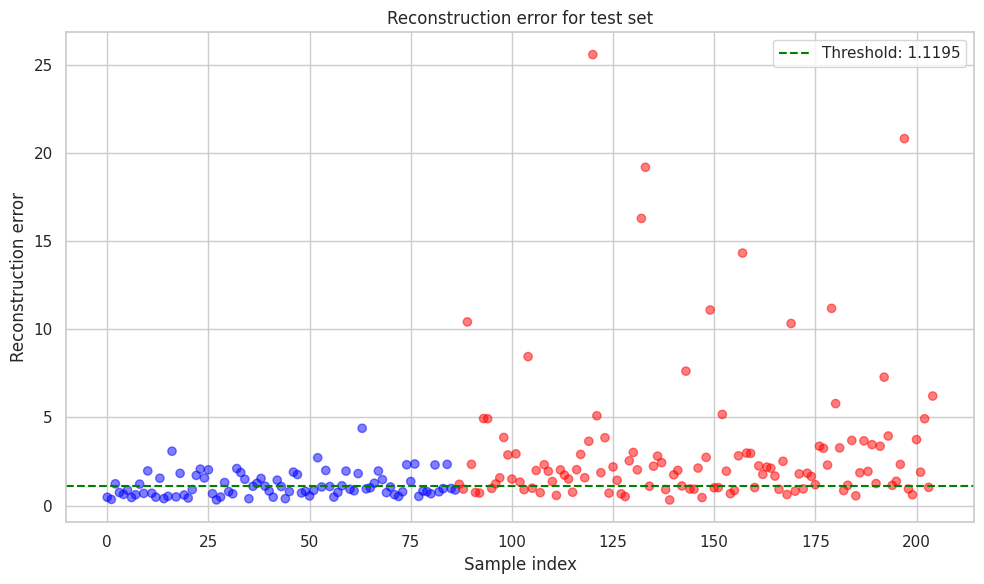

[I 2025-11-24 14:54:08,823] Trial 5 finished with value: 0.7203389830508474 and parameters: {'epochs': 97, 'patience': 5, 'dropout': 0.3869602207946582, 'encoding_dim': 24}. Best is trial 0 with value: 0.7203389830508474.


Training autoencoder...
Epoch 10/91, Loss: 1.142309
Early stopping at epoch 16


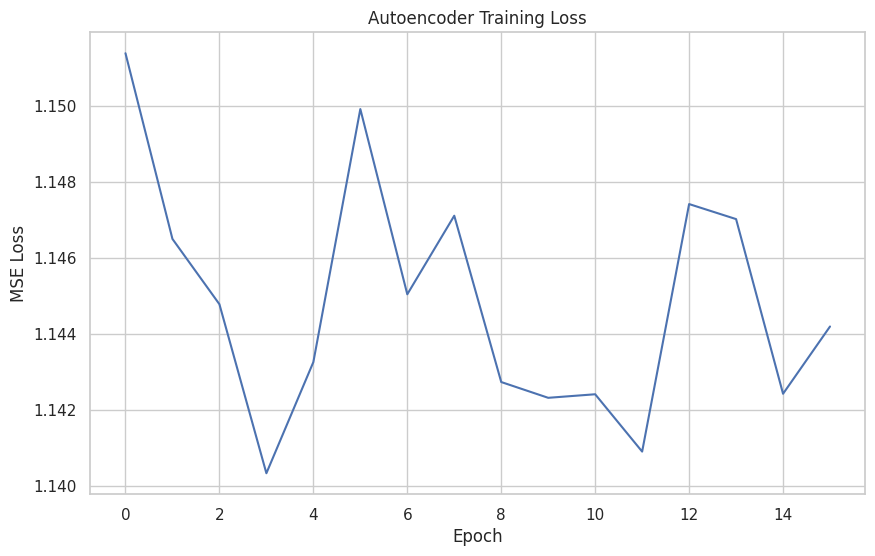

Threshold for anomaly detection: 1.121271

Autoencoder performance:
Precision: 0.7203
Recall: 0.7203
F1 Score: 0.7203


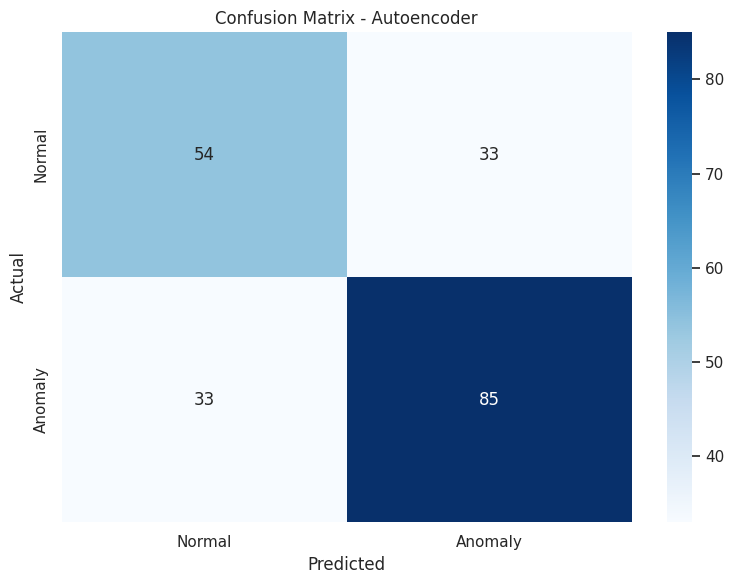

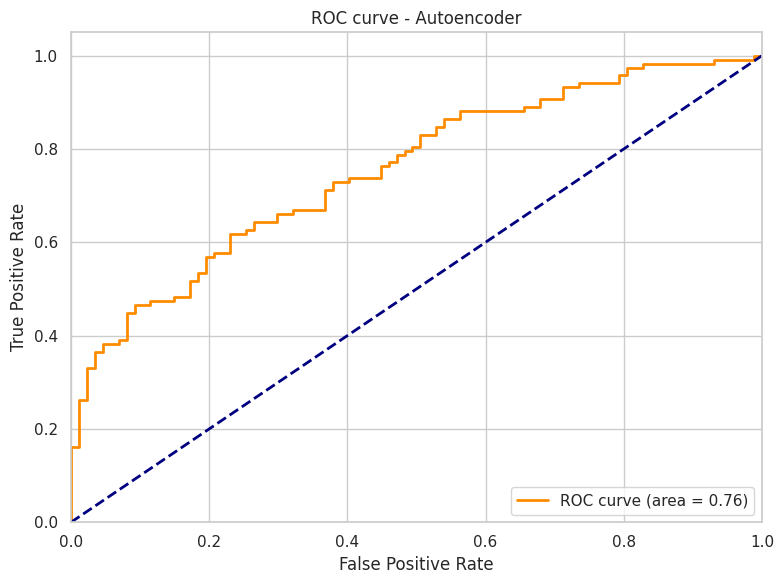

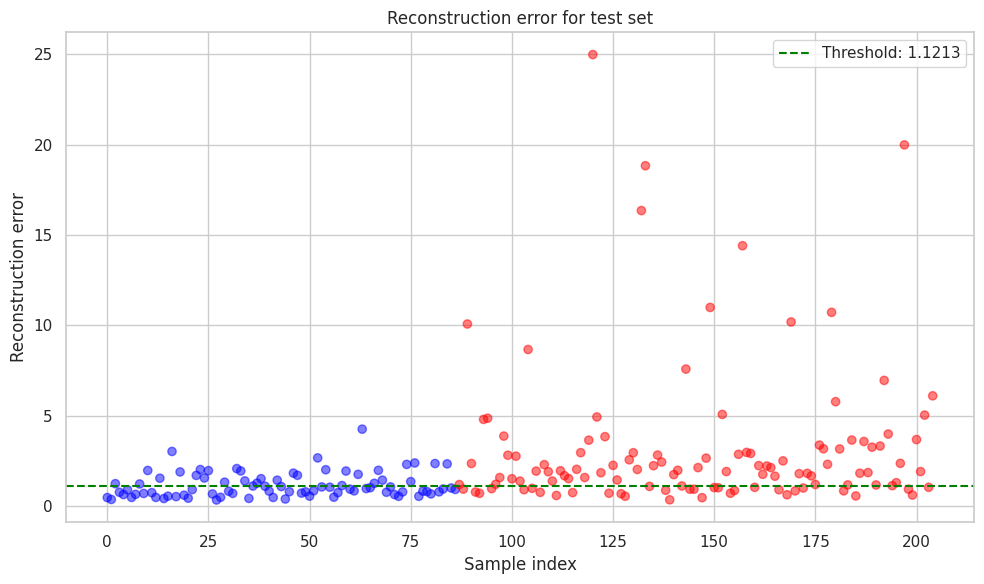

[I 2025-11-24 14:54:19,845] Trial 6 finished with value: 0.7203389830508474 and parameters: {'epochs': 91, 'patience': 12, 'dropout': 0.3479912714848361, 'encoding_dim': 66}. Best is trial 0 with value: 0.7203389830508474.


Training autoencoder...
Epoch 10/15, Loss: 1.145481
Early stopping at epoch 15


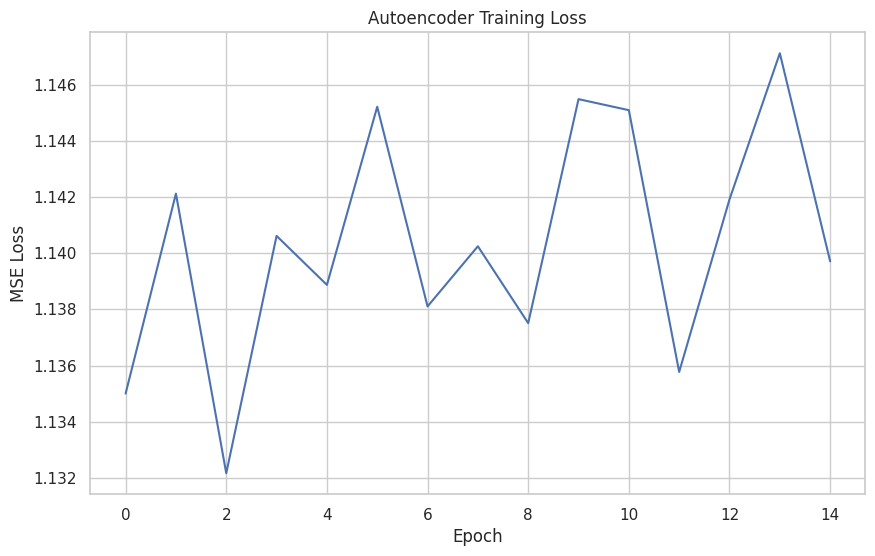

Threshold for anomaly detection: 1.169109

Autoencoder performance:
Precision: 0.7203
Recall: 0.7203
F1 Score: 0.7203


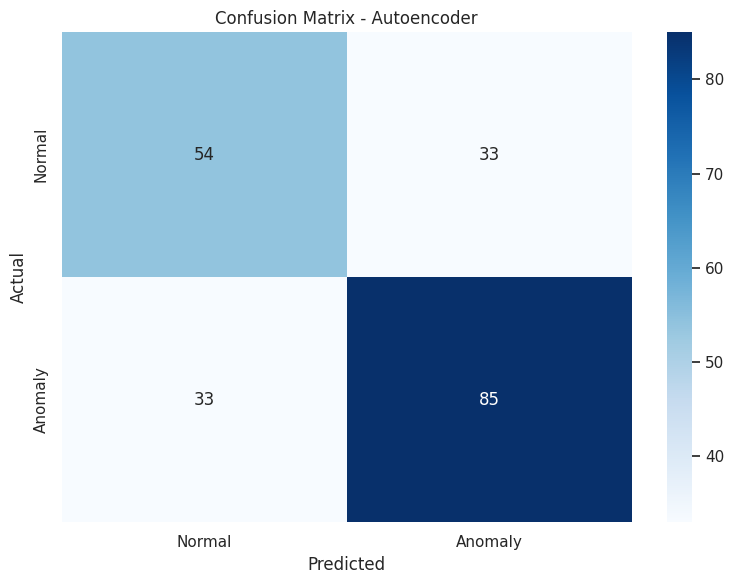

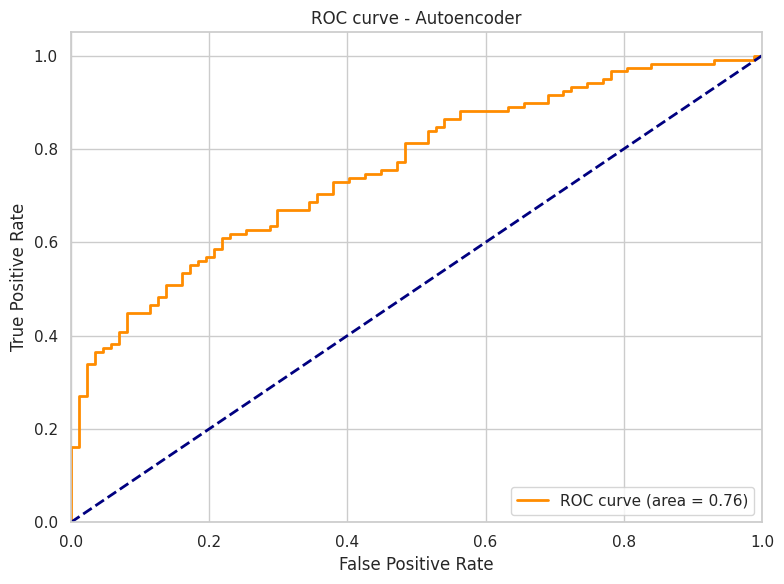

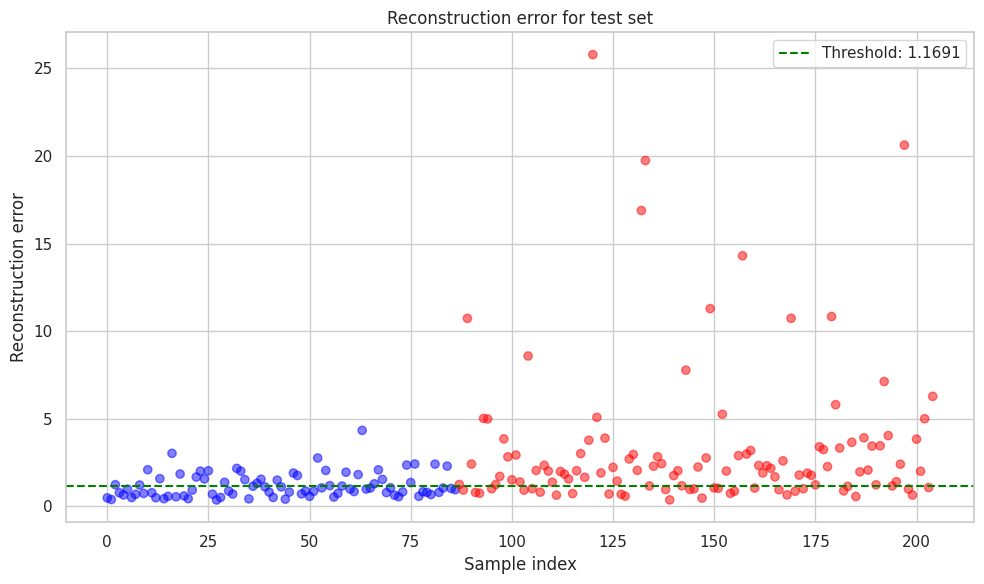

[I 2025-11-24 14:54:30,347] Trial 7 finished with value: 0.7203389830508474 and parameters: {'epochs': 15, 'patience': 12, 'dropout': 0.2202747648772968, 'encoding_dim': 61}. Best is trial 0 with value: 0.7203389830508474.


Training autoencoder...
Epoch 10/83, Loss: 1.141963
Epoch 20/83, Loss: 1.138331
Early stopping at epoch 23


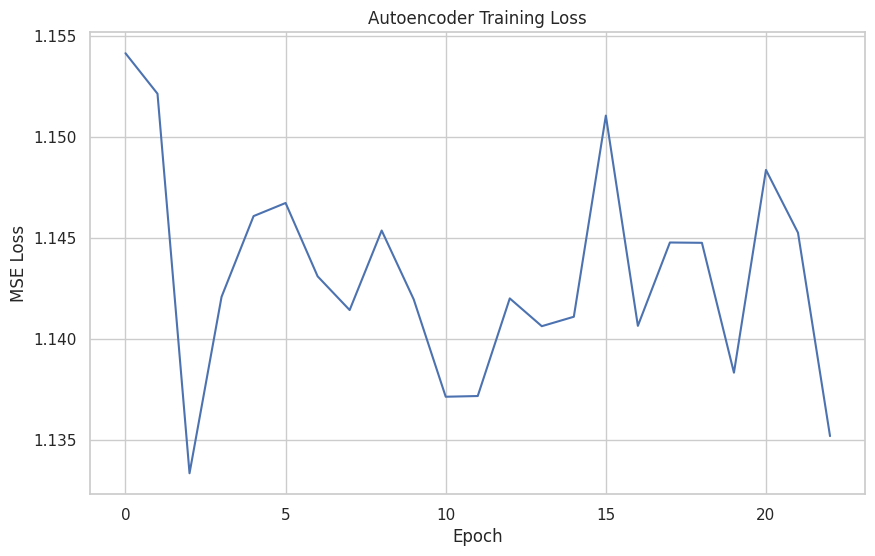

Threshold for anomaly detection: 1.161247

Autoencoder performance:
Precision: 0.7119
Recall: 0.7119
F1 Score: 0.7119


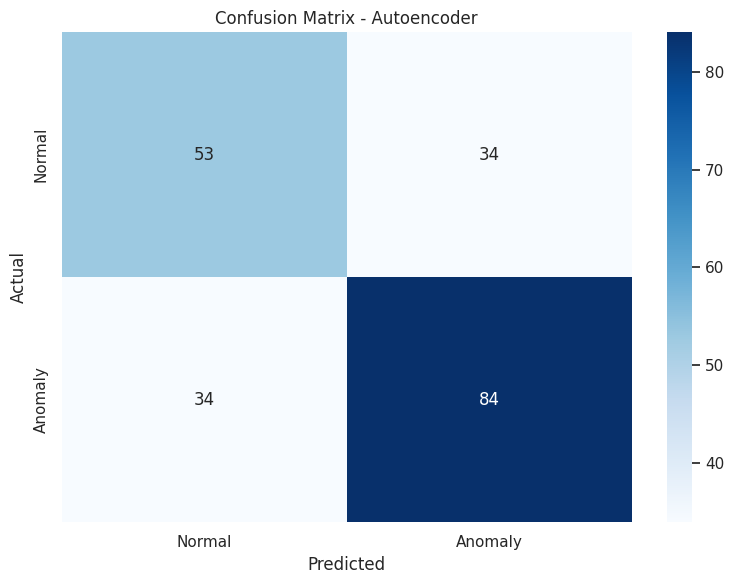

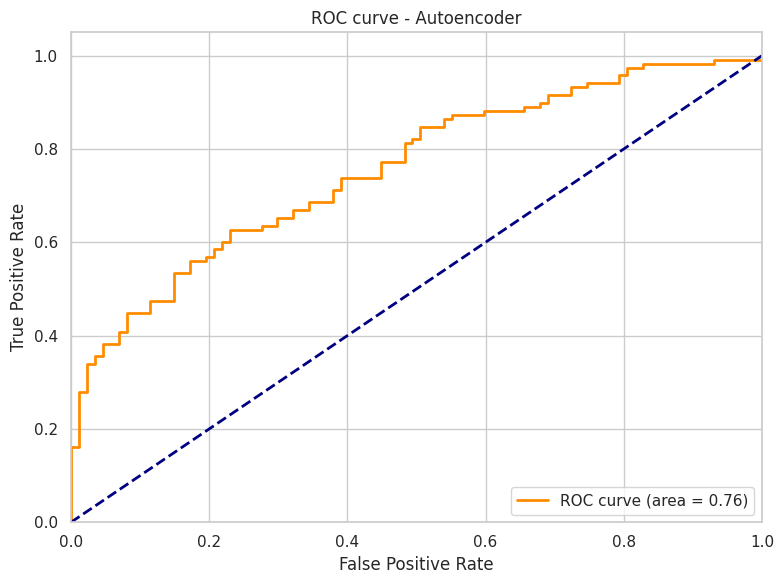

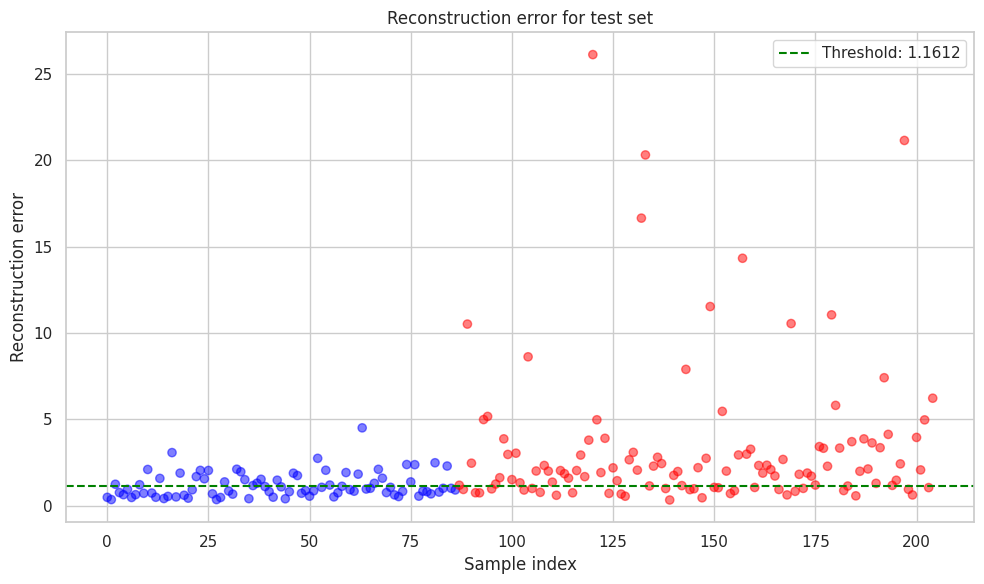

[I 2025-11-24 14:54:40,864] Trial 8 finished with value: 0.711864406779661 and parameters: {'epochs': 83, 'patience': 20, 'dropout': 0.42368938253646493, 'encoding_dim': 55}. Best is trial 0 with value: 0.7203389830508474.


Training autoencoder...
Epoch 10/85, Loss: 1.153756
Epoch 20/85, Loss: 1.153771
Early stopping at epoch 20


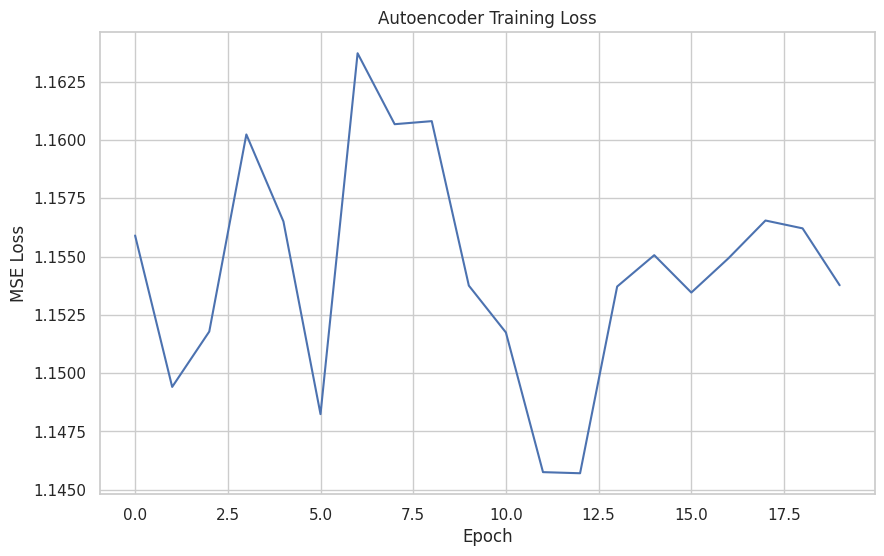

Threshold for anomaly detection: 1.145747

Autoencoder performance:
Precision: 0.7119
Recall: 0.7119
F1 Score: 0.7119


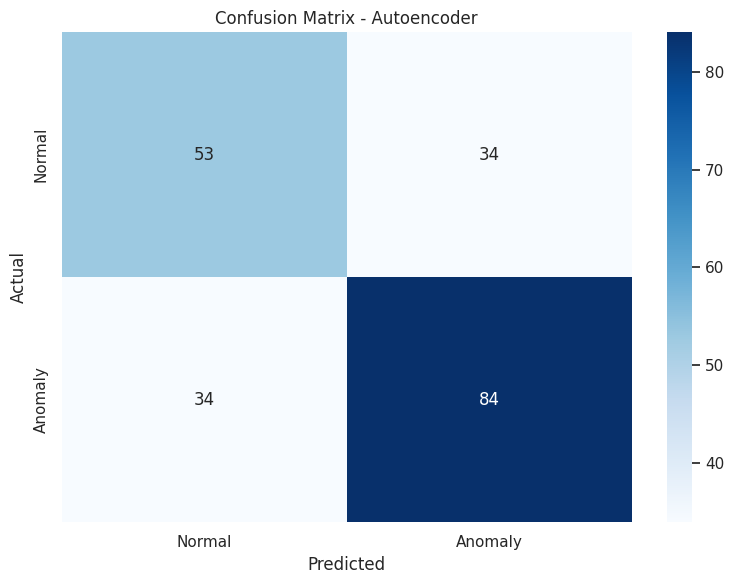

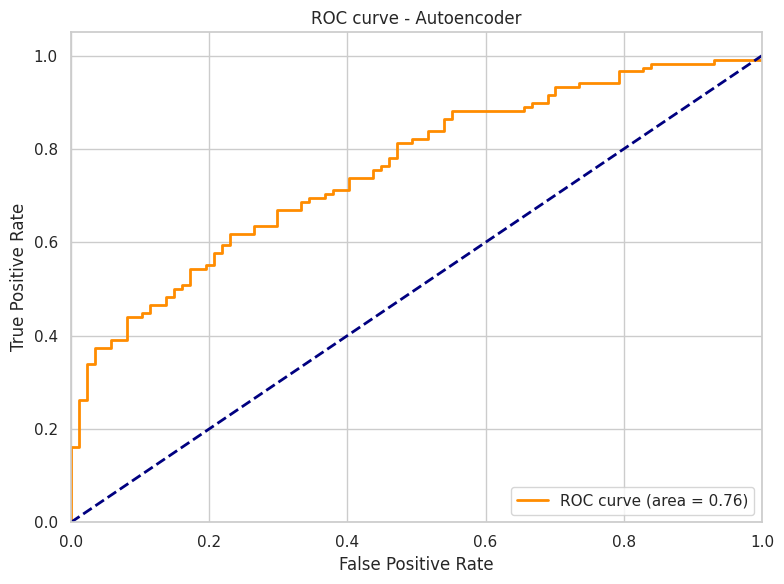

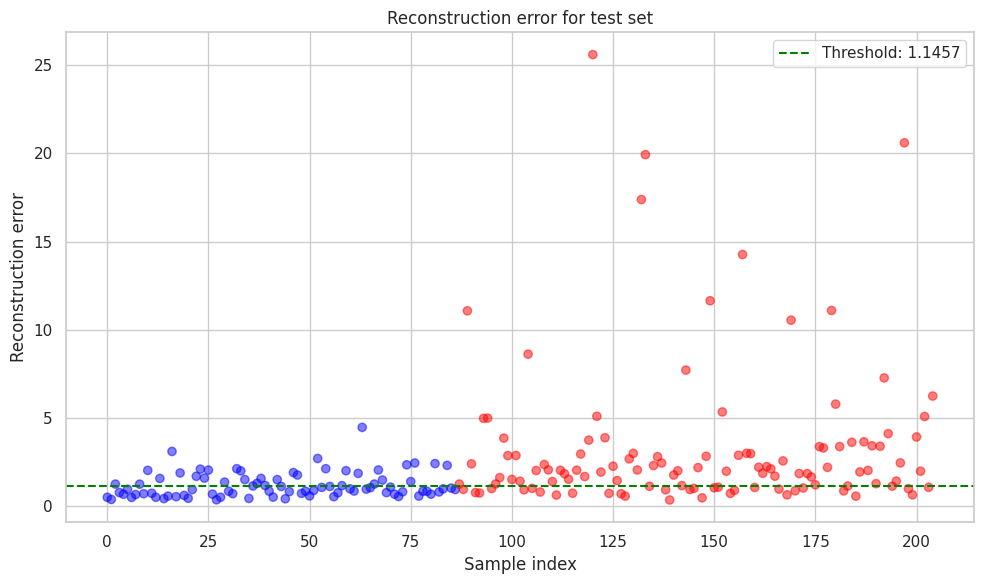

[I 2025-11-24 14:54:52,165] Trial 9 finished with value: 0.711864406779661 and parameters: {'epochs': 85, 'patience': 7, 'dropout': 0.4015652116203018, 'encoding_dim': 81}. Best is trial 0 with value: 0.7203389830508474.


Best trial:
  Value:  0.7203389830508474
  Params: 
    epochs: 13
    patience: 7
    dropout: 0.40461634003629265
    encoding_dim: 98


In [29]:
#using optuna for GAN
import optuna
def objective(trial):
      epochs = trial.suggest_int("epochs", 10, 100)
      patience = trial.suggest_int("patience", 5, 20)
      dropout= trial.suggest_float("dropout", 0.2, 0.5)
      encoding_dim= trial.suggest_int("encoding_dim", 10, 100)
      latent_dim=encoding_dim
      model = Autoencoder(input_dim, latent_dim)
      model = train_autoencoder(model,train_loader, epochs, patience)
      generator = model.decoder
      model = Discriminator(input_dim=input_dim, dropout=dropout)
      optimizer_D = torch.optim.Adam(model.parameters(), lr=0.0002)
      optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002)
      discriminator, generator = training_discriminator(num_epochs=num_epochs)
      model.decoder = generator
      cv_errors = compute_reconstruction_error(model, X_cv_tensor)
      threshold = np.percentile(cv_errors, 100 * (1 - contamination))
      print(f"Threshold for anomaly detection: {threshold:.6f}")
      y_pred = (cv_errors > threshold).astype(int)
      metrics = evaluate_autoencoder(y_cross_val, y_pred, cv_errors, threshold)
      return metrics[2]

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
best_parameters = study.best_params
best_objective = study.best_value
print("Best trial:")
print("  Value: ", best_objective)
print("  Params: ")
for key, value in best_parameters.items():
    print("    {}: {}".format(key, value))

### 5) XGBOOST
We implement now an **XGBoost (Extreme Gradient Boosting)** model for anomaly detection. Since XGBoost is a supervised learning algorithm, it requires labeled data for training. So we fix a little the dataset.





In [30]:
!pip install xgboost

In [31]:
# Step 1: shuffle and split data into training, validation, and test sets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]


# Convert to numpy arrays for easier manipulation
X = stationary_df.values
#X = new_stationary_df.values
y = y_stationary

# Step 1: Creating training/cross-validation/test set with reshuffling

# Reshuffle the data (this will break down autocorrelation)
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

# Separate normal and anomalous examples
X_normal = X_shuffled[y_shuffled == 0]
X_anomaly = X_shuffled[y_shuffled == 1]

# Calculate sizes for each set
n_normal = X_normal.shape[0]
n_anomaly = X_anomaly.shape[0]

# Training set: 80% of normal examples
train_normal_size = int(0.85* n_normal)
train_anomaly_size = int(0.9 * n_anomaly)
X_train_normal = X_normal[:train_normal_size]
X_train_anomaly = X_anomaly[:train_anomaly_size]
X_train = np.vstack((X_train_normal, X_train_anomaly))
y_train = np.hstack((np.zeros(train_normal_size), np.ones(train_anomaly_size)))


# Cross-validation set: 10% of normal examples and 50% of anomalies
cv_normal_size = int(0 * n_normal)
cv_anomaly_size = int(0 * n_anomaly)
#X_cv_normal = X_normal[train_size:train_size + cv_normal_size]
#X_cv_anomaly = X_anomaly[:cv_anomaly_size]
#X_cross_val = np.vstack((X_cv_normal, X_cv_anomaly))
#y_cross_val = np.hstack((np.zeros(cv_normal_size), np.ones(cv_anomaly_size)))

# Test set: 10% of normal examples and 50% of anomalies
X_test_normal = X_normal[train_normal_size + cv_normal_size:]
X_test_anomaly = X_anomaly[cv_anomaly_size:]
X_test = np.vstack((X_test_normal, X_test_anomaly))
y_test = np.hstack((np.zeros(len(X_test_normal)), np.ones(len(X_test_anomaly))))

# We'll standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_cross_val = scaler.transform(X_cross_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} {y_train.shape[0]}(both normal or anomalies)")
print(f"Cross-validation set size: {X_cross_val.shape[0]} ({cv_normal_size} normal, {cv_anomaly_size} anomalies)")
print(f"Test set size: {X_test.shape[0]} ({len(X_test_normal)} normal, {len(X_test_anomaly)} anomalies)")


Training set size: 955 955(both normal or anomalies)
Cross-validation set size: 205 (0 normal, 0 anomalies)
Test set size: 368 (131 normal, 237 anomalies)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:54:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XG_boost Performance:
Precision: 0.9784
Recall: 0.9536
F1 Score: 0.9658


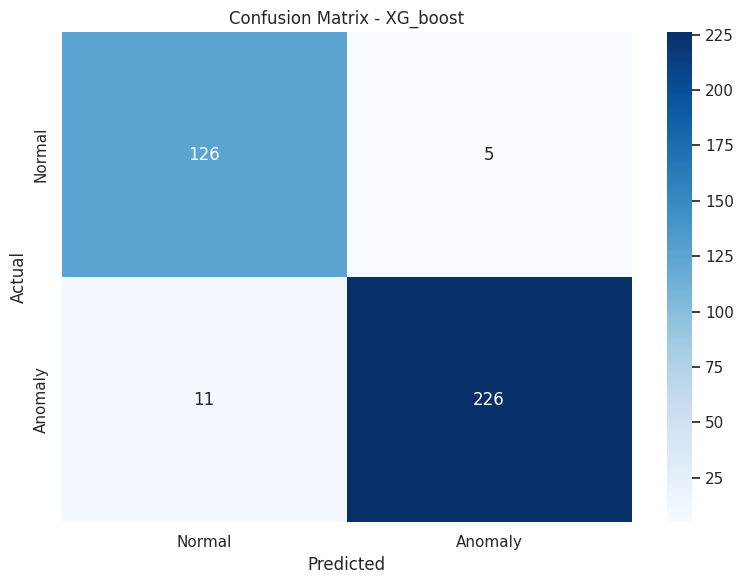

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1]


In [32]:
from xgboost import XGBClassifier
# Modello XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Addestramento
xgb_model.fit(X_train, y_train)

# Predizione
y_pred_xgb = xgb_model.predict(X_test)

# Valutazione
xgboost_metrics = evaluate_model(y_test, y_pred_xgb, None, "XG_boost",results_df, save_results=True)

print(y_pred_xgb)

## Best model selection


Let's do a final comparison of the anomaly detection models we've trained and evaluated, ordered by F1 score.

In [33]:
from IPython.display import display

# Sort by F1 Score in descending order
sorted_results = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Round values for cleaner appearance
sorted_results[['Precision', 'Recall', 'F1 Score']] = sorted_results[['Precision', 'Recall', 'F1 Score']].round(4)

# Display the sorted table nicely
display(sorted_results)

Model  Precision  Recall  F1 Score
0                               XG_boost     0.9784  0.9536    0.9658
1    Local Outlier Factor (Unsupervised)     0.6779  0.8487    0.7537
2                                    MVG     0.6031  0.9832    0.7476
3        Isolation Forest (Unsupervised)     0.6838  0.7815    0.7294
4           One-Class SVM (Unsupervised)     0.6643  0.7983    0.7252
5  Gaussian Mixture Model (Unsupervised)     0.7227  0.7227    0.7227
6                                    GAN     0.7193  0.6891    0.7039
7                       SVM (Supervised)     0.8841  0.5126    0.6489
8             Random Forest (Supervised)     1.0000  0.0252    0.0492